# import modules

In [1]:
import pandas as pd
import numpy as np
from functions import load_data, remove_nans
import matplotlib.pyplot as plt
import os
import seaborn as sns

## load classification data

In [3]:
df = None
df = load_data("/home/jbosman/datav7.2_flux_weighed_reduced/", "all")

# overview = overview_data_table(df)

# print("before preselection")
# print(overview.to_latex(index=False))

mask_z_dir = df['E.trks.dir.z[.,0]'] > 0
mask_energy = (df["E.trks.E[.,0]"]<=20) | (df["E.trks.E[.,1]"]<=20)
# mask_radius = np.sqrt((X_full['jmuon_pos_x'] - centre_x)**2 + (X_full['jmuon_pos_y'] - centre_y)**2) < approx_r*radius_crit
# mask_pos_z = X_full['jmuon_pos_z'] > pos_z_crit
# mask_likelihood = X_full['jmuon_likelihood'] > threshold_likelihood
# mask_geometry = mask_pos_z | mask_radius

# mask = mask_likelihood & mask_energy & mask_geometry & mask_z_dir
mask = mask_energy & mask_z_dir

df = df[mask]

# overview = overview_data_table(df)

# print("after preselection")
# print(overview.to_latex(index = False))
# overview =None



## load bjorkeny data

In [3]:
X_full = None
y_full = None
df = None
df = load_data("/home/jbosman/datav9.0/dsts/", "neutrino")

energy_crit = 50
z_dir_crit = 0
# df = df[(df["pdgid"]==14)&(df["is_cc"]==1)]
mask_z_dir = df['E.trks.dir.z[:,0]'] > 0
mask_energy = (df["E.trks.E[:,0]"] <= energy_crit) | (df["E.trks.E[:,1]"] <= energy_crit)
mask = mask_z_dir & mask_energy

df = df[mask]
# df = df[df["energy"]<=20]
# df = df[np.invert((df['closest[.,0,0]']==1e20) | (df['closest[.,0,1]']==1e20) | (df['closest[.,0,2]']==1e20) | (df['closest[.,1,0]']==1e20) | (df['closest[.,1,1]']==1e20) | (df['closest[.,1,2]']==1e20)  )] 
# x_min = df["E.trks.pos.x[.,0]"].min()
# x_max = df["E.trks.pos.x[.,0]"].max()
# y_min = df["E.trks.pos.y[.,0]"].min()
# y_max = df["E.trks.pos.y[.,0]"].max()
# z_min = df["E.trks.pos.z[.,0]"].min()
# z_max = df["E.trks.pos.z[.,0]"].max()
# height = z_max-z_min
# radius = np.sqrt(((x_max-x_min)/2)**2+((y_max-y_min)/2)**2)
# radius_crit = 0.5
# z_pos_crit = 0.1
# df = df[(df["E.trks.pos.x[.,0]"]>x_min+radius_crit*radius) & (df["E.trks.pos.x[.,0]"]<x_max-radius_crit*radius) & (df["E.trks.pos.y[.,0]"]>y_min+radius_crit*radius) & (df["E.trks.pos.y[.,0]"]<y_max-radius_crit*radius) & (df["E.trks.pos.z[.,0]"]>z_min+height*z_pos_crit) & (df["E.trks.pos.z[.,0]"]<z_max-height*z_pos_crit)&(df["E.trks.pos.z[.,1]"]>z_min+height*z_pos_crit) & (df["E.trks.pos.z[.,1]"]<z_max-height*z_pos_crit)]


plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["figure.labelsize"] = 14
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 12

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 836, in H5Fopen
    unable to synchronously open file
  File "H5F.c", line 796, in H5F__open_api_common
    unable to open file
  File "H5VLcallback.c", line 3863, in H5VL_file_open
    open failed
  File "H5VLcallback.c", line 3675, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 128, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 2003, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 392, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/home/jbosman/datav9.0/dsts/KM3NeT_00000100_bestQ_000XXXXX.mc.gsg_neutrinos.jterbr.jppmuon_jppshower-upgoing_static.offline.dst.v9.0.root'

## phase diagrams full data

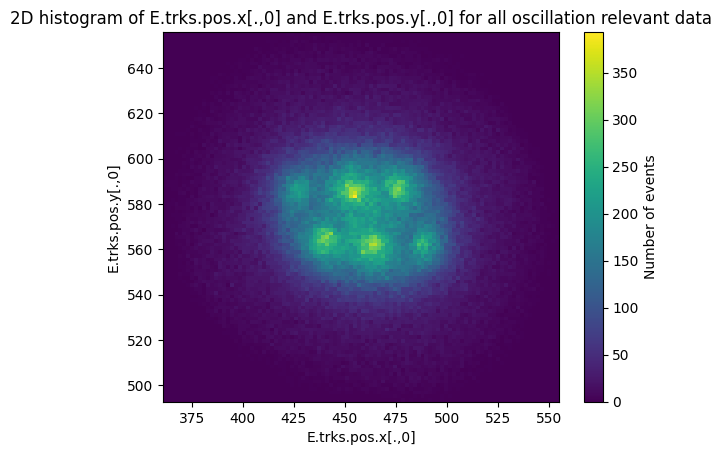

In [6]:
# most important columns according to base classifier for Bjrokeny y
# 1. feature T.sum_jppshower.prefit_posfit_distance (0.037915)
# 2. feature gandalf_shfit_lik_ratio (0.028620)
# 3. feature E.trks.fitinf[:,0,5] (0.028572)
# 4. feature RGS_track_tau (0.022123)
# 5. feature crkv_nhits50[:,0,0] (0.020021)
# 6. feature angle_shfit_gandalf (0.018925)
# 7. feature T.feat_Neutrino2020.QupOvernHits (0.018615)
# 8. feature ratio_both_tot_jg (0.017532)
# 9. feature T.sum_jpptrack.n_within_1deg (0.017132)
# 10. feature T.sum_jppshower.ratio_prefit_fits_near_best (0.016258)
# 11. feature dt_shfit_gandalf (0.016168)
# 12. feature ratio_E_jshf_gandalf (0.015001)
# 13. feature E.trks.fitinf[:,0,9] (0.014681)
# 14. feature E.trks.E[:,1] (0.014525)
# 15. feature closest[:,0,0] (0.014242)
# 16. feature T.sum_jppshower.mean_tres_selected_hits (0.013874)
# 17. feature log_distance_shfit_gandalf_for_shfit_time (0.012814)
# 18. feature T.feat_Neutrino2020.dClosestApproach (0.012686)
# 19. feature closest[:,1,2] (0.012478)
# 20. feature ratio_both_tot_jsh (0.012475)


column_1 = "E.trks.pos.x[.,0]"
column_2 = "E.trks.pos.y[.,0]"

col_1_log = False
col_2_log = False

min1 = np.min(df[column_1])
max1 = np.max(df[column_1])
min2 = np.min(df[column_2])
max2 = np.max(df[column_2])

save_plot = False




hist = plt.hist2d(df[column_1], df[column_2], bins=100, cmap='viridis', range=[[min1, max1], [min2, max2]])
colorbar = plt.colorbar(hist[3])
colorbar.set_label('Number of events')
plt.xlabel(column_1)
if col_1_log:
    plt.xscale("log")
plt.ylabel(column_2)
if col_2_log:
    plt.yscale("log")
plt.title("2D histogram of "+column_1+" and "+column_2+" for all oscillation relevant data")

# Set the font size for the tick labels
if save_plot:
    plt.savefig("figures_bjorkeny/2d_histogram_"+label_name+"_"+column_1+"_"+column_2+".png")
plt.show()


In [6]:
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["figure.labelsize"] = 14
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

## check weighting

In [15]:
# print(df[df["is_neutrino"]==]["weight_one_year"][:5])
print(len(df[df["is_neutrino"]==0]))

print("total events per year according to own weighting")
print("amount of muon events in 1 year: ", df[df["is_neutrino"]==0]["weight_one_year"].sum())
print("amount of neutrino events in 1 year: ", df[df["is_neutrino"]==1]["flux_weight"].sum())

print("total events according to evt.weight")
print("amount of muon events: ", df[df["is_neutrino"]==0]["T.sum_mc_evt.weight"].sum())
print("amount of neutrino events: ", df[df["is_neutrino"]==1]["T.sum_mc_evt.weight"].sum())

print("mean exposures")
print(df[df["is_neutrino"]==0]["exposure"].mean())
print(df[df["is_neutrino"]==1]["exposure"].mean())
print(60*60*24*365)

print("evt.weight times exposure per year")
print((df[df["is_neutrino"]==0]["T.sum_mc_evt.weight"]*df[df["is_neutrino"]==0]["exposure"]).sum()/(60*60*24*365))
print((df[df["is_neutrino"]==1]["T.sum_mc_evt.weight"]*df[df["is_neutrino"]==1]["exposure"]).sum()/(60*60*24*365))




3328736
total events per year according to own weighting
amount of muon events in 1 year:  8528287.544397006
amount of neutrino events in 1 year:  5768.410894619893
total events according to evt.weight
amount of muon events in 1 year:  10316921.0
amount of neutrino events in 1 year:  7969.752
mean exposures
3482763.8
40288376.0
31536000
evt.weight times exposure per year
1139383.0274013192
11098.976503297818


according to current flux correct weights, the amount of muons and neutrinos for our cuts in one year are:
amount of muon events in 1 year:  8528287.544397006
amount of neutrino events in 1 year:  5768.410894619893

In [4]:
df = None
df_manual = pd.read_hdf("/home/jbosman/NIKHEF_repo/mcv7.2.gsg_elec-CC_1-100GeV.km3sim.jorcarec.jsh.aanet.dst_merged.root.h5")

print(len(df_manual))

print("total events per year according to weight_one_year weighting")
print("amount of neutrino events in 1 year: ", df_manual["flux_weight"].sum())

print("total events according to evt.weight")
print("amount of neutrino events: ", df_manual["T.sum_mc_evt.weight"].sum())

print("mean exposures")
print(df_manual["exposure"].mean())
print(60*60*24*365)

print("evt.weight times exposure per year")
print((df_manual["T.sum_mc_evt.weight"]*df_manual["exposure"]).sum()/(60*60*24*365))

print("total events according to manual weighting")
print("amount of neutrino events in 1 year: ", df_manual["manual_flux_weight"].sum()/(60*60*24*365))

# print("total events per year according to manual weighting")
# print("amount of neutrino events in 1 year: ", df_manual["manual_flux_weight"].sum())


17980
total events per year according to weight_one_year weighting
amount of neutrino events in 1 year:  1630.5970295719676
total events according to evt.weight
amount of neutrino events:  277.0104
mean exposures
8354438.5
31536000
evt.weight times exposure per year
73.38489700659564
total events according to manual weighting
amount of neutrino events in 1 year:  115039.34098265127


# Data Analysis

## print all columns

In [10]:
for column in df.columns:
    print(column)

E.frame_index
energy
E.mc_trks.dir.z[.,0]
E.mc_trks.pos.x[.,0]
E.mc_trks.pos.y[.,0]
E.mc_trks.pos.z[.,0]
pdgid
E.run_id
E.trigger_counter
E.trigger_mask
E.trks.E[.,0]
E.trks.E[.,1]
E.trks.dir.x[.,0]
E.trks.dir.x[.,1]
E.trks.dir.y[.,0]
E.trks.dir.y[.,1]
E.trks.dir.z[.,0]
E.trks.dir.z[.,1]
E.trks.fitinf[.,0,0]
E.trks.fitinf[.,0,10]
E.trks.fitinf[.,0,13]
E.trks.fitinf[.,0,14]
E.trks.fitinf[.,0,15]
E.trks.fitinf[.,0,16]
E.trks.fitinf[.,0,1]
E.trks.fitinf[.,0,2]
E.trks.fitinf[.,0,5]
E.trks.fitinf[.,0,6]
E.trks.fitinf[.,0,7]
E.trks.fitinf[.,0,8]
E.trks.fitinf[.,0,9]
E.trks.lik[.,0]
E.trks.lik[.,1]
E.trks.pos.x[.,0]
E.trks.pos.x[.,1]
E.trks.pos.y[.,0]
E.trks.pos.y[.,1]
E.trks.pos.z[.,0]
E.trks.pos.z[.,1]
E.trks.t[.,0]
E.trks.t[.,1]
T.feat_Neutrino2020.QupMinusQdn
T.feat_Neutrino2020.QupOvernHits
T.feat_Neutrino2020.cherCond_hits_meanZposition
T.feat_Neutrino2020.cherCond_hits_trig_meanZposition
T.feat_Neutrino2020.cherCond_n_doms
T.feat_Neutrino2020.cherCond_n_doms_trig
T.feat_Neutrino2020.ch

In [3]:
# simulation_columns = [column for column in df.columns if "mc" in column]
# simulation_columns.append("is_neutrino")
# simulation_columns.append("exposure")
# simulation_columns.append("weight_one_year")
# simulation_columns.append("flux_weight")
# simulation_columns.append("E.frame_index")
# simulation_columns.append("energy")
# simulation_columns.append("pdgid")
# simulation_columns.append("E.run_id")
# simulation_columns.append("E.trigger_counter")
# simulation_columns.append("E.trigger_mask")
# simulation_columns.append("weight_rate")
# simulation_columns.append("w2")
# simulation_columns.append("ngen")
# simulation_columns.append("cos_zenith_true")
# simulation_columns.append("E_min_gen")
# simulation_columns.append("is_cc")

# print(simulation_columns)

simulation_columns = ['E.mc_trks.dir.z[:,0]', 'E.mc_trks.pos.x[:,0]', 'E.mc_trks.pos.y[:,0]', 'E.mc_trks.pos.z[:,0]', 'T.sum_mc_evt.livetime_DAQ', 
                      'T.sum_mc_evt.weight', 'T.sum_mc_evt.weight_noOsc', 'T.sum_mc_nu.by', 'is_neutrino', 'exposure', 'weight_one_year', 'flux_weight', 
                      'E.frame_index', 'energy', 'pdgid', 'E.run_id', 'E.trigger_counter', 'E.trigger_mask', 'weight_rate', 'w2', 'ngen', 'cos_zenith_true'
                      ,"E_min_gen", "is_cc"]


## All Histograms

### classification

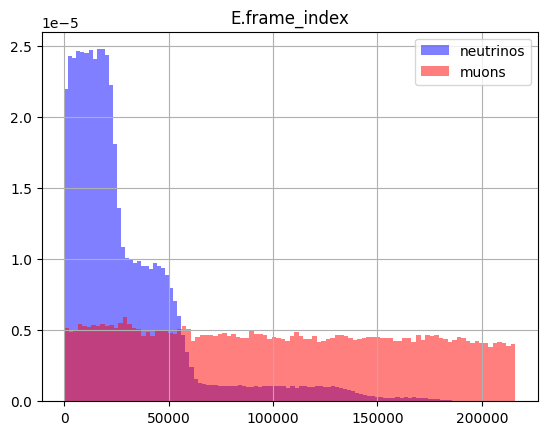

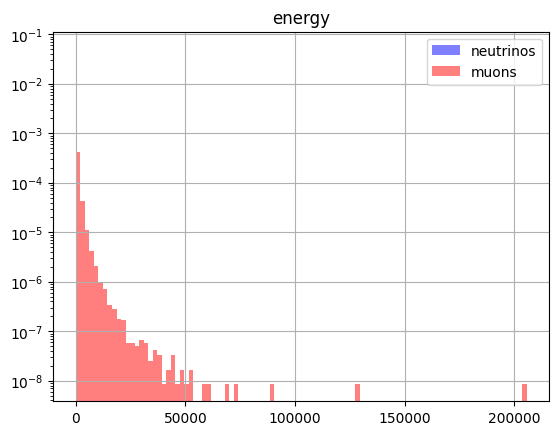

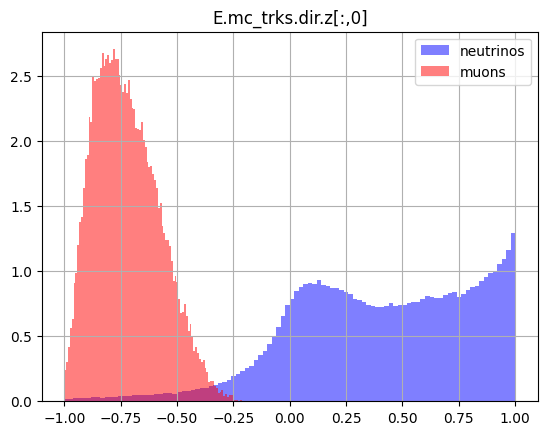

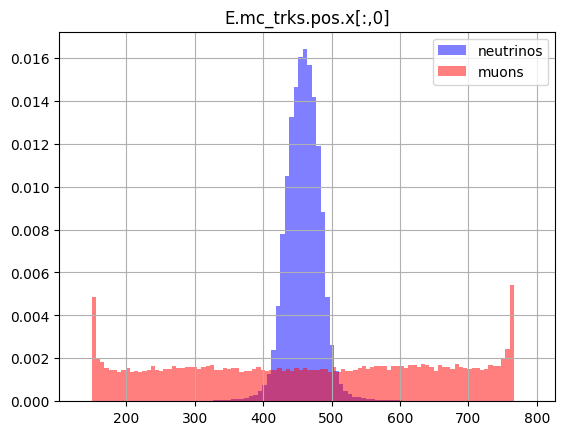

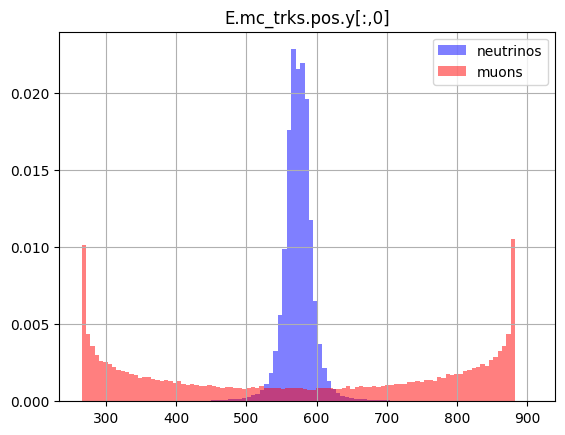

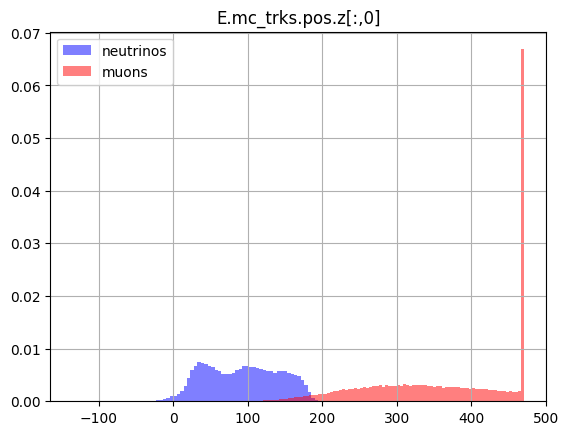

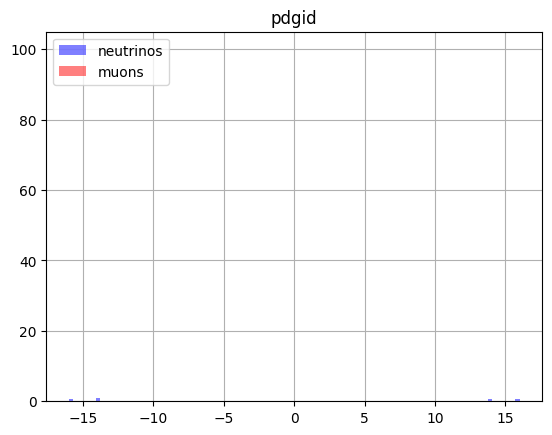

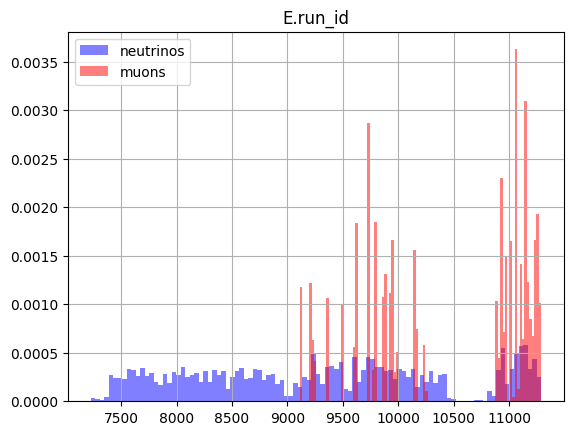

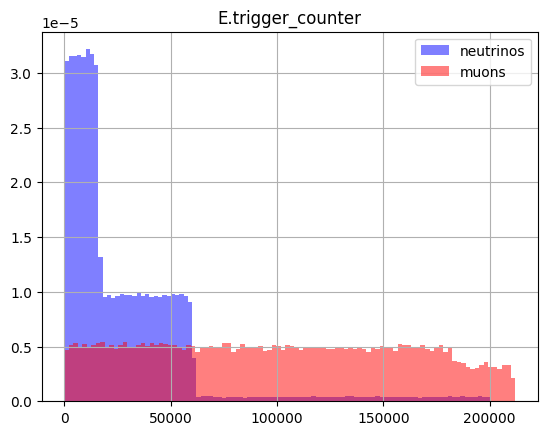

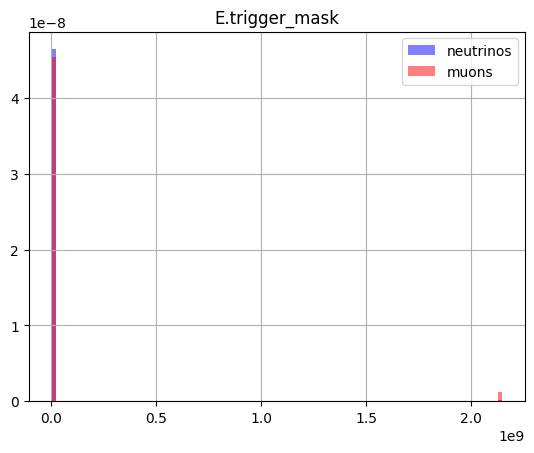

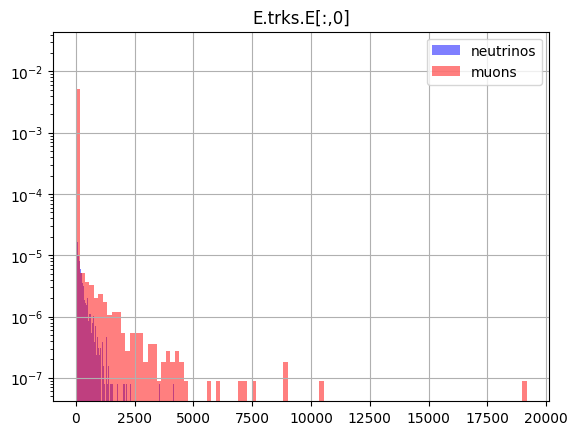

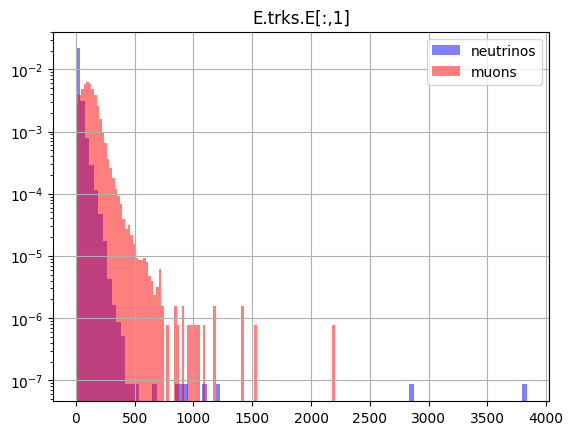

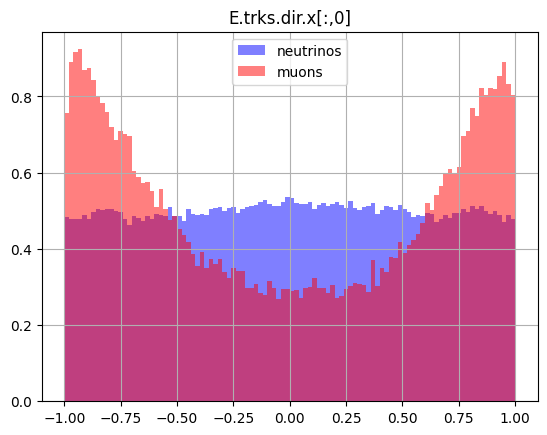

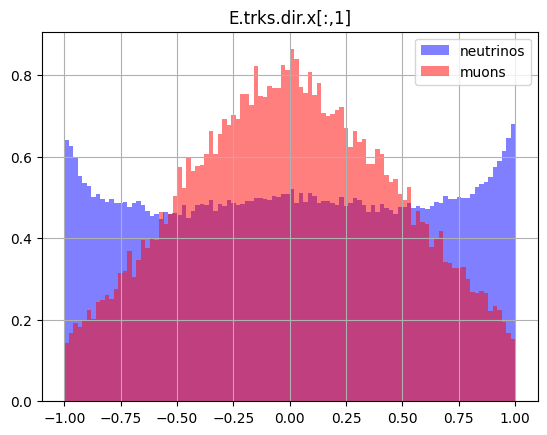

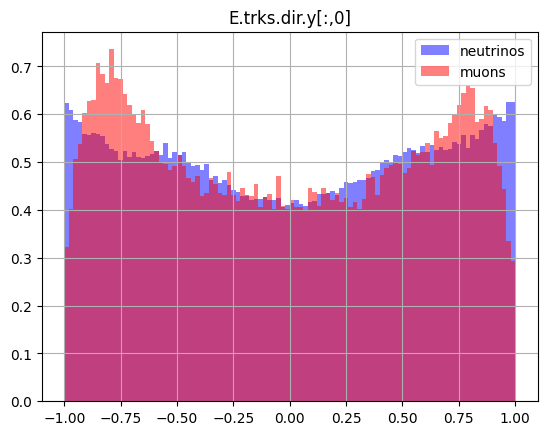

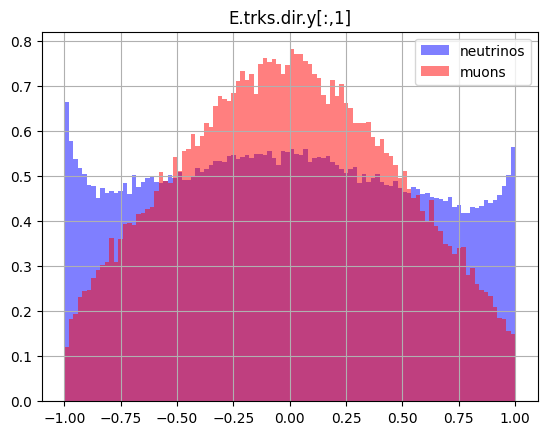

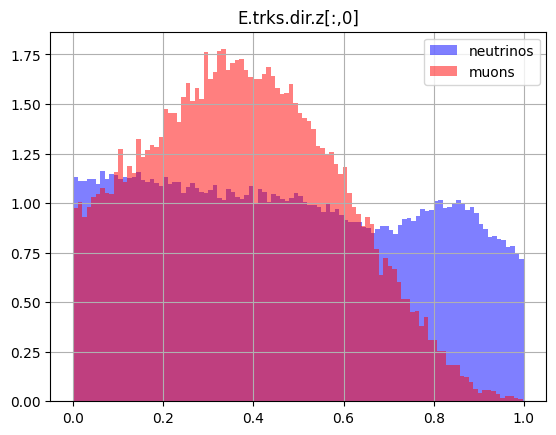

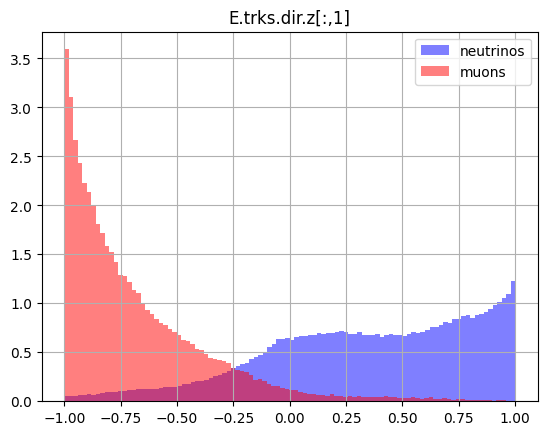

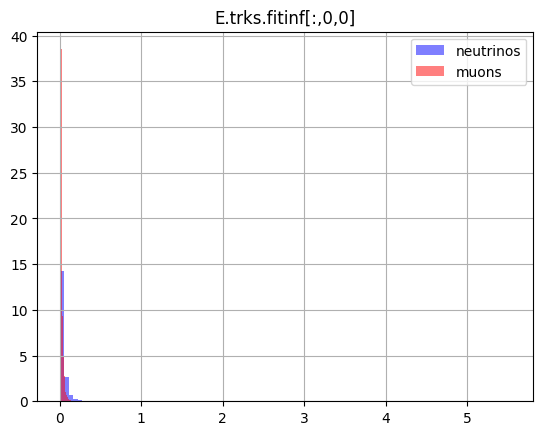

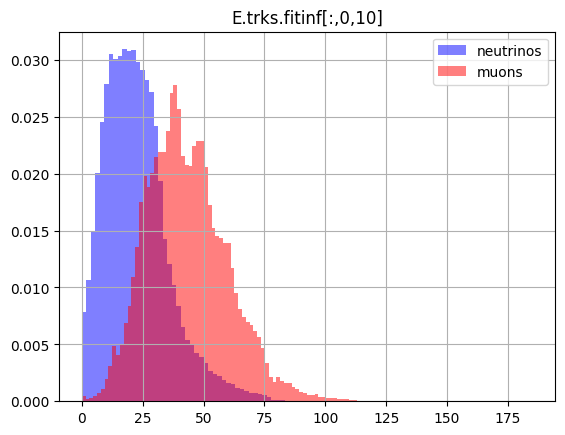

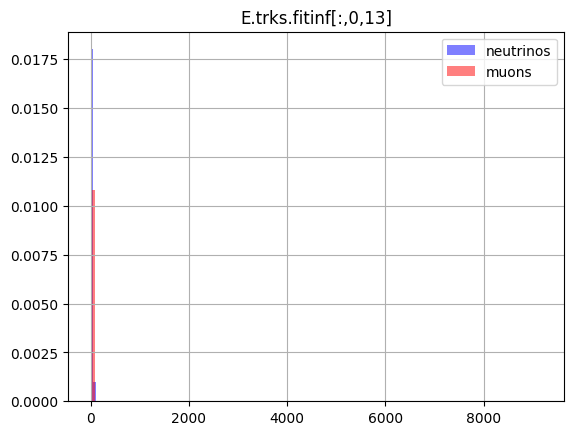

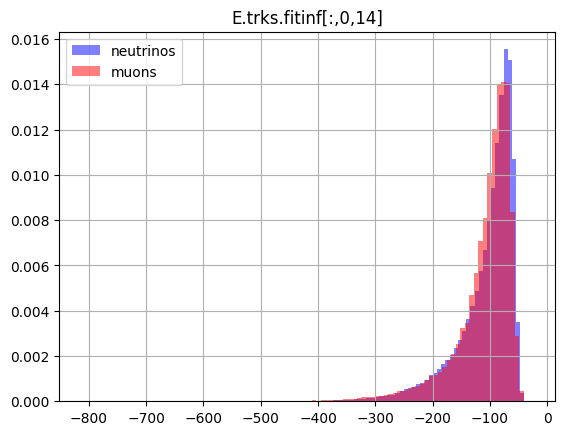

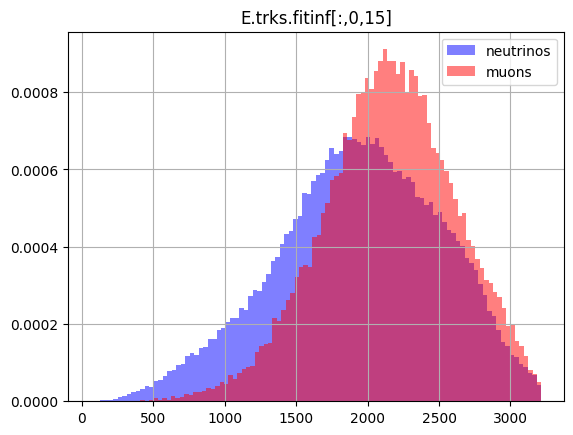

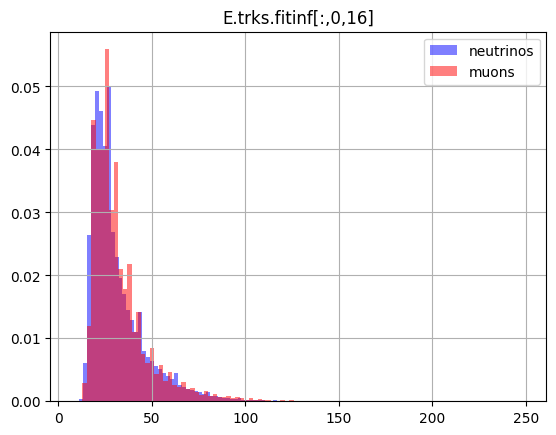

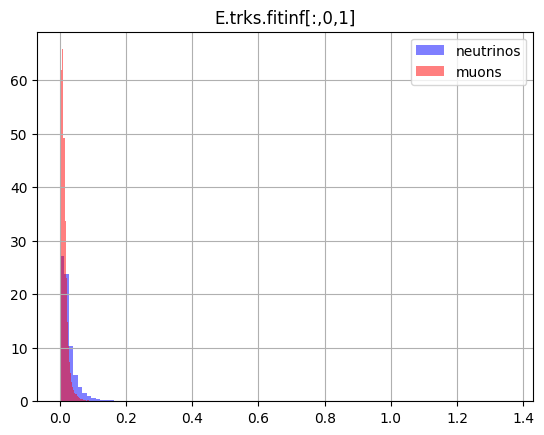

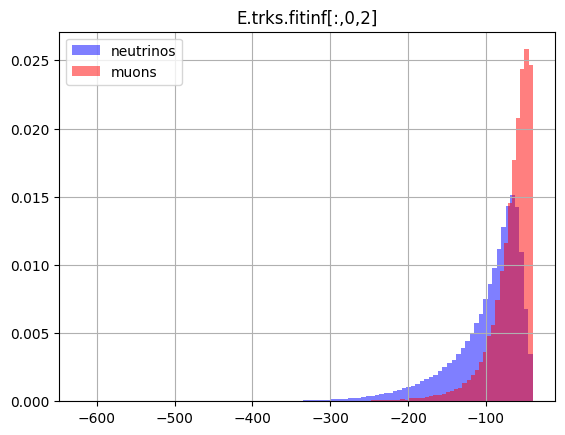

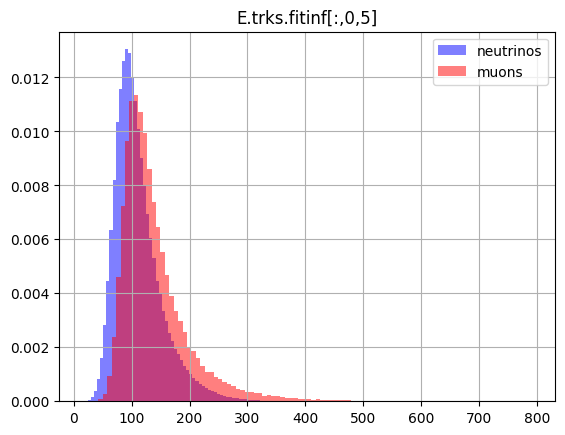

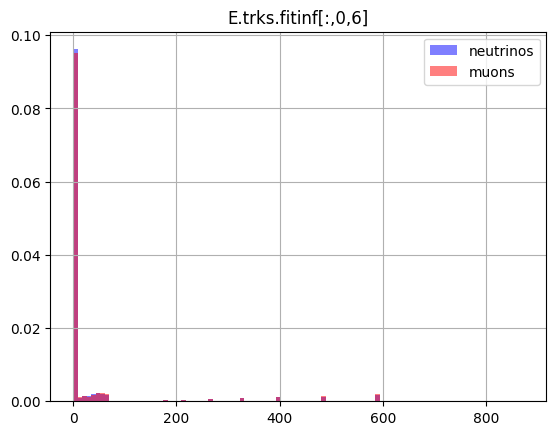

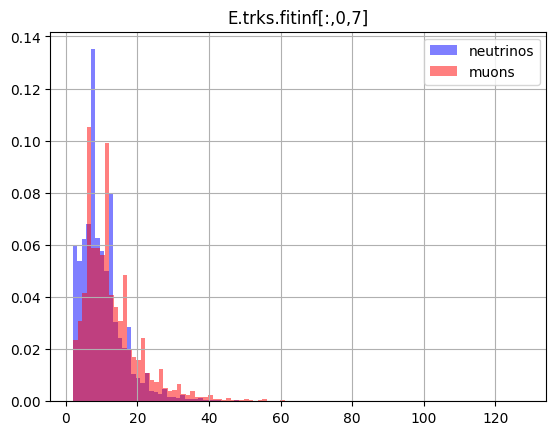

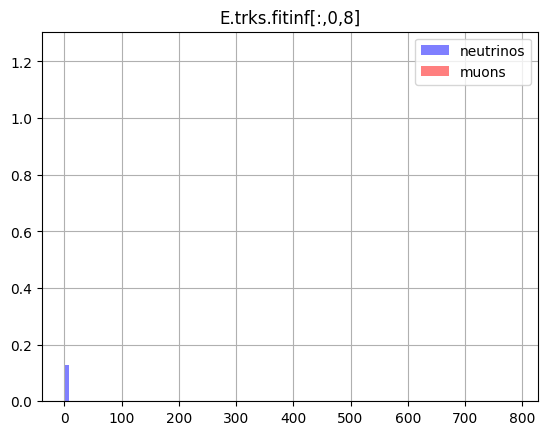

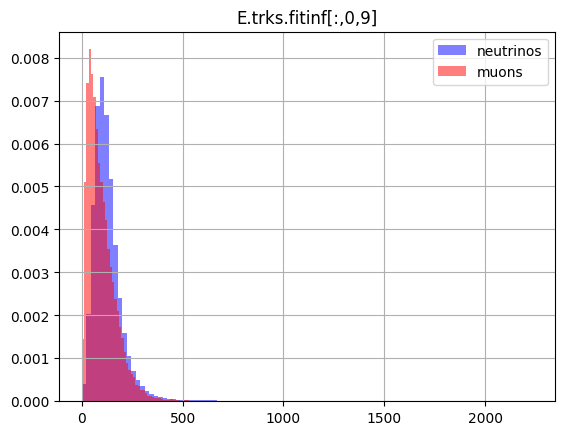

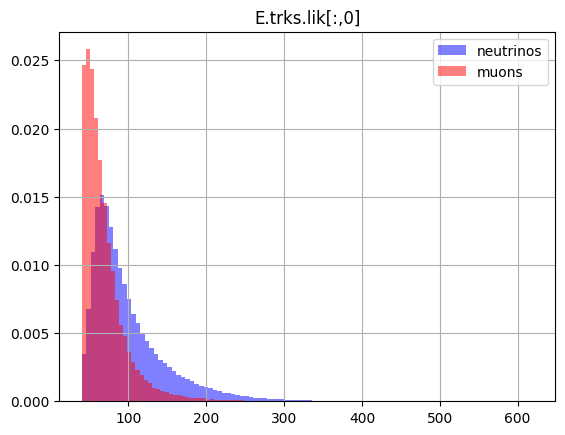

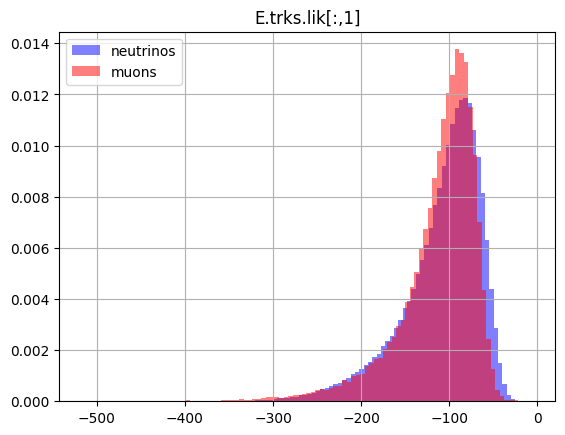

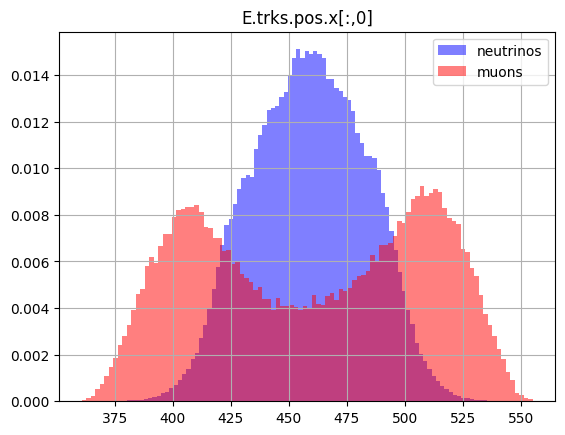

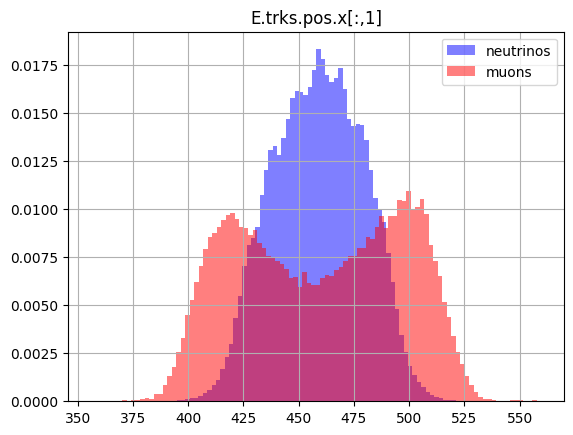

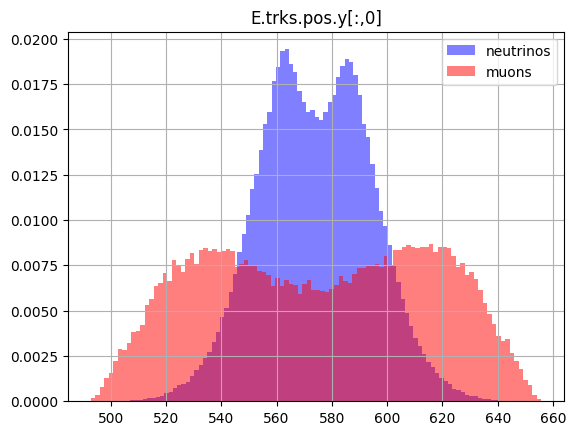

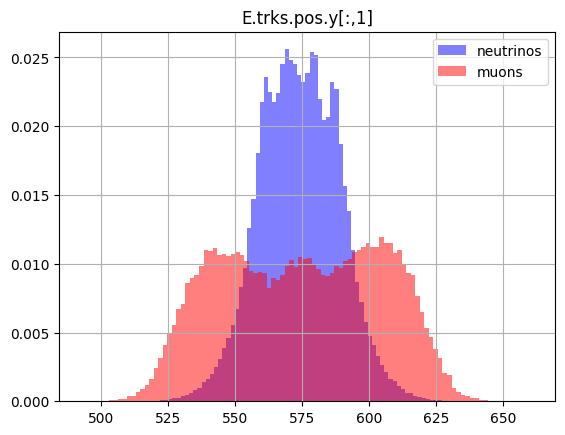

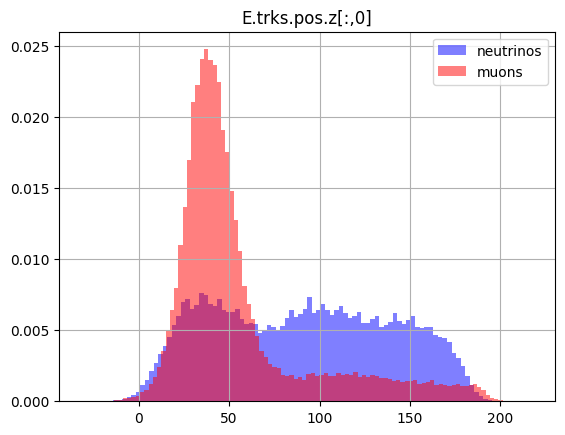

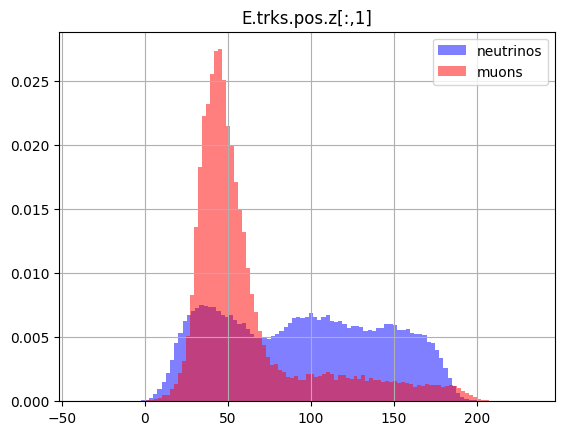

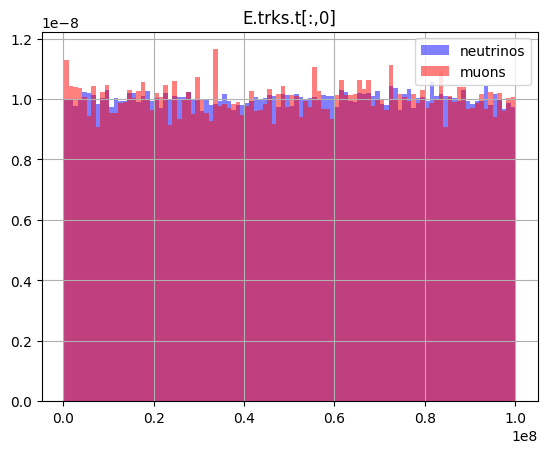

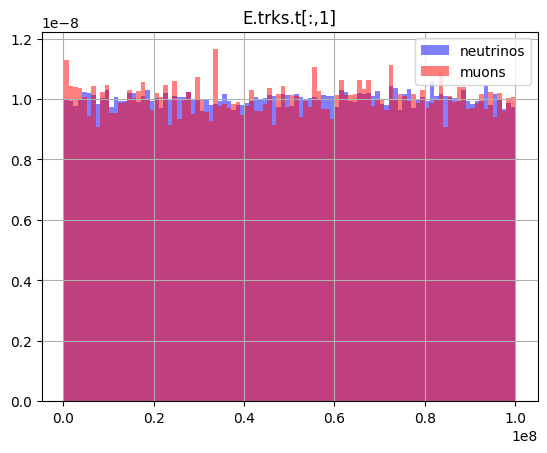

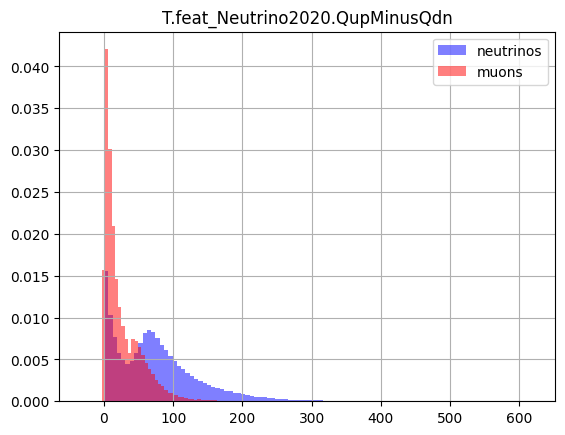

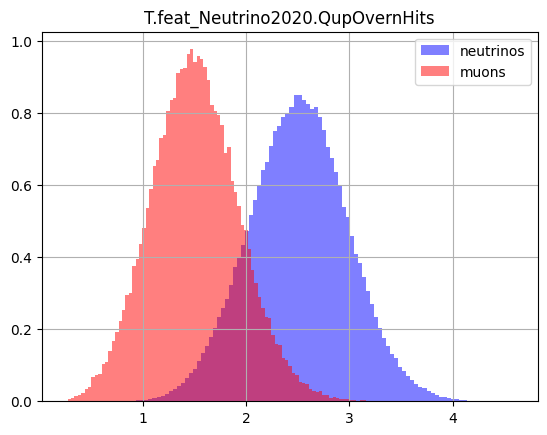

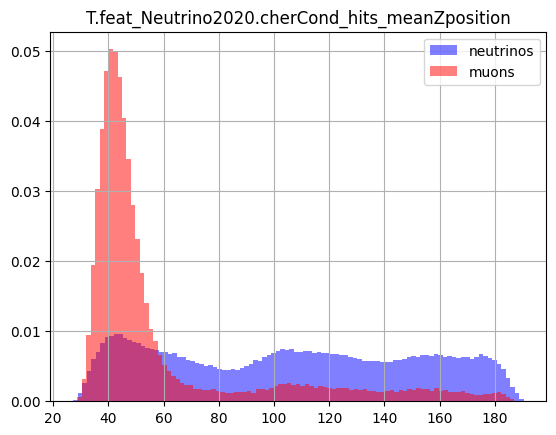

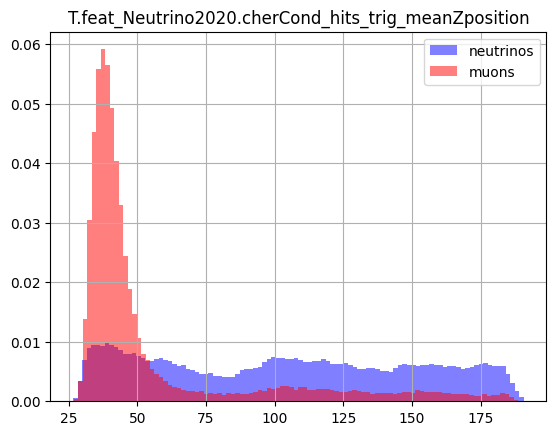

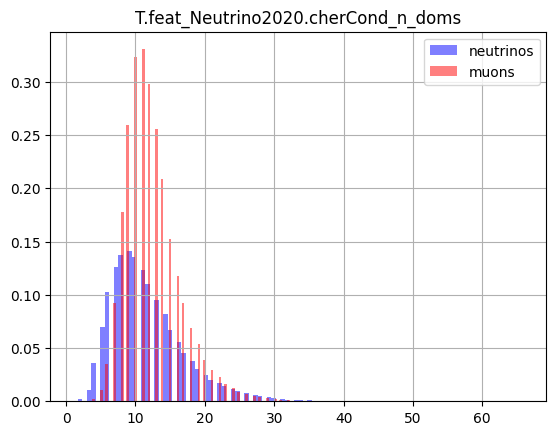

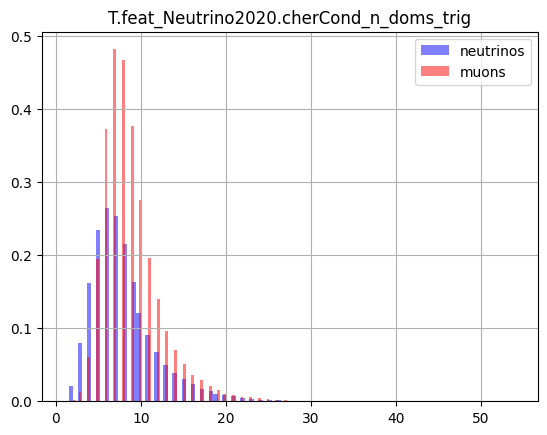

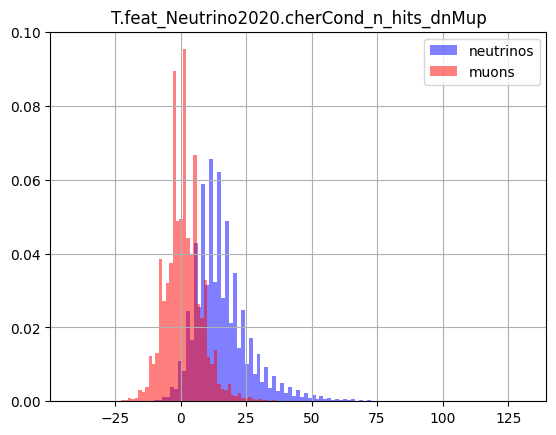

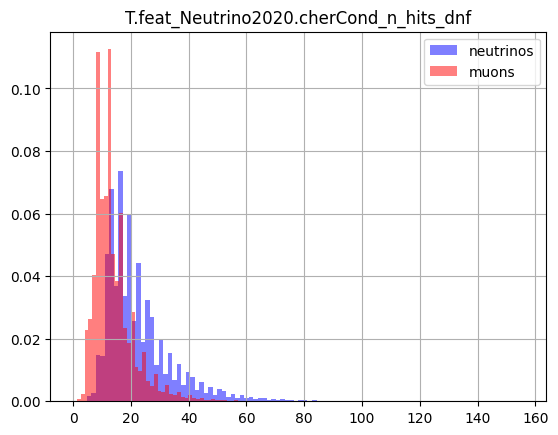

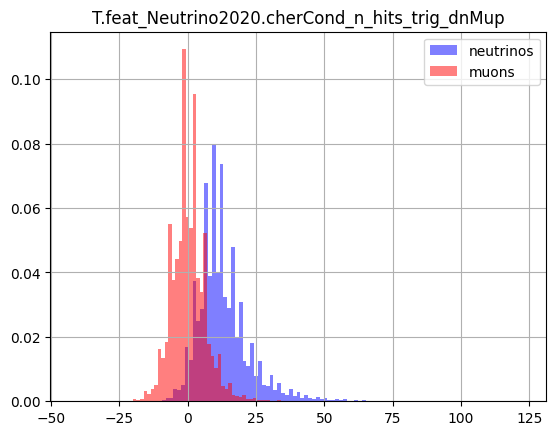

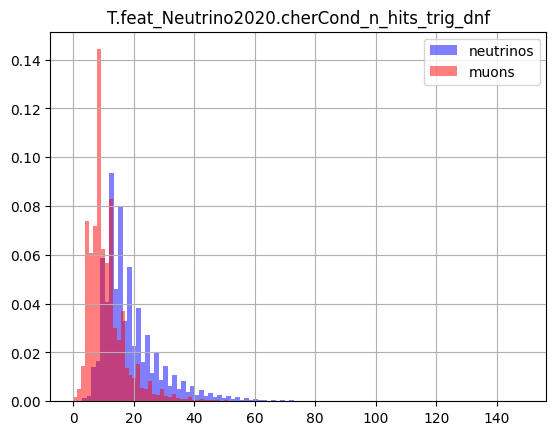

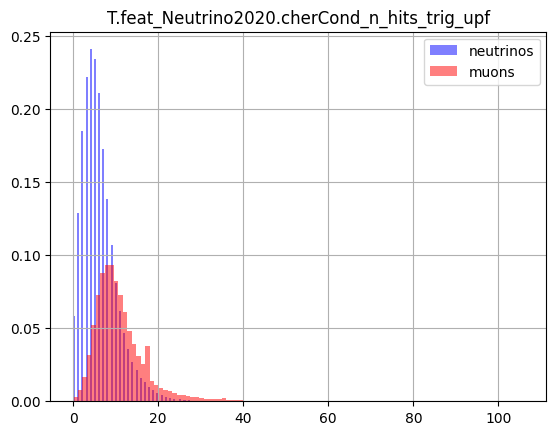

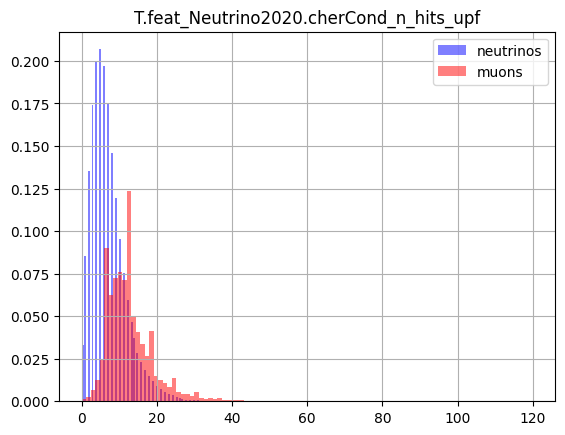

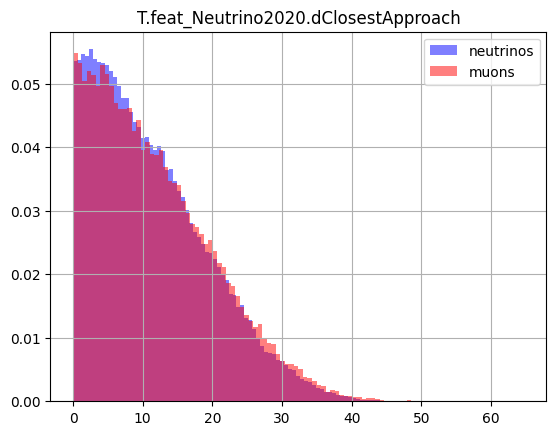

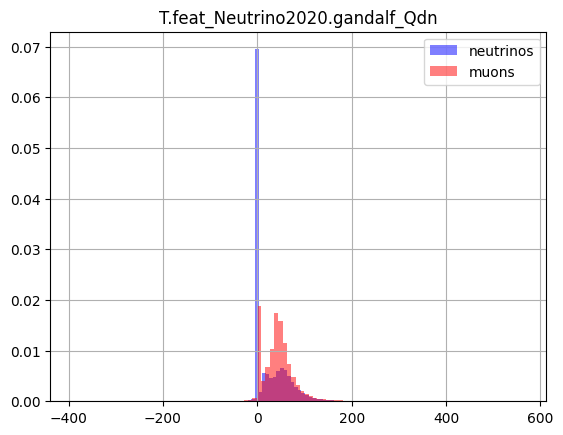

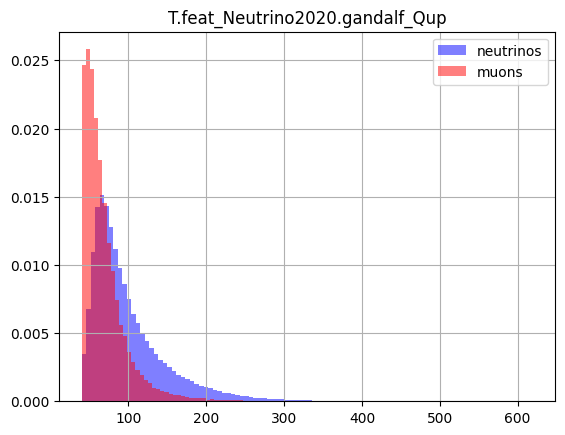

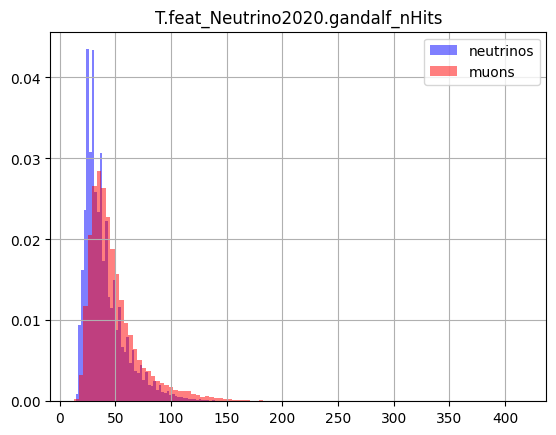

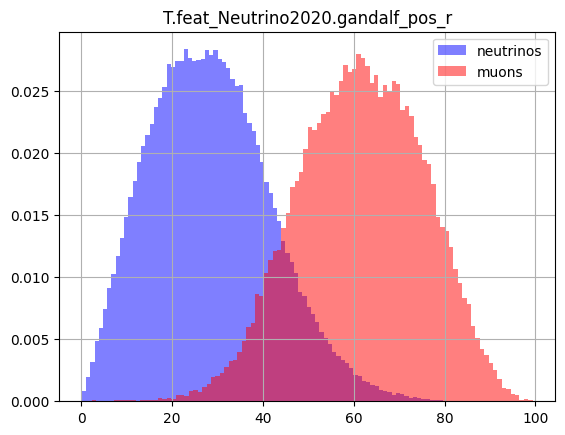

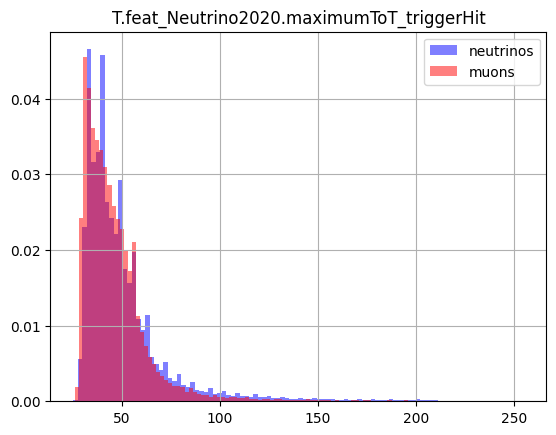

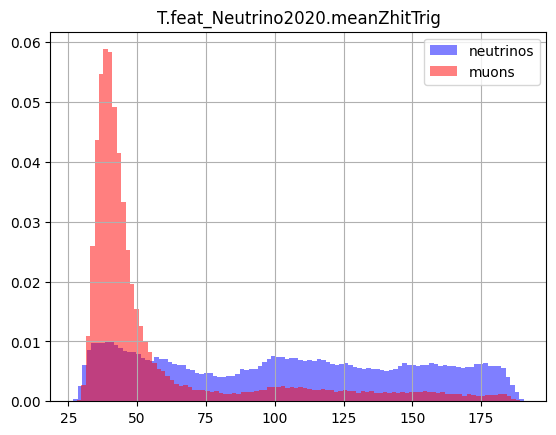

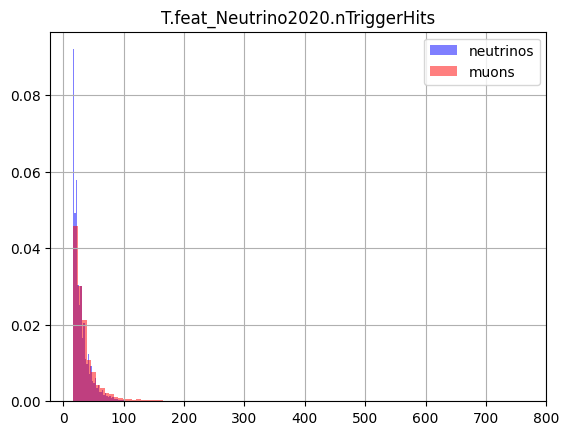

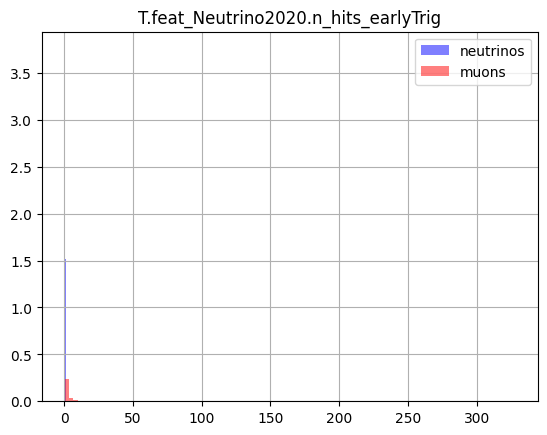

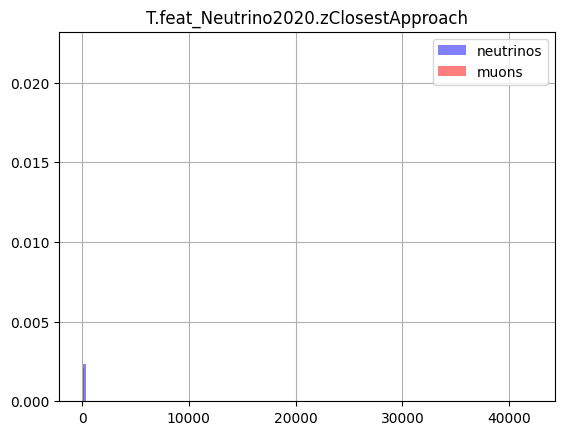

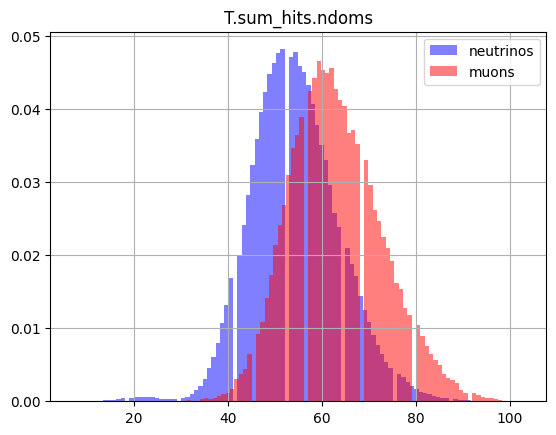

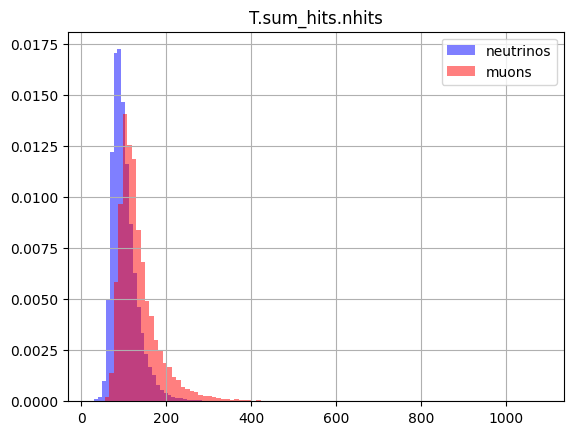

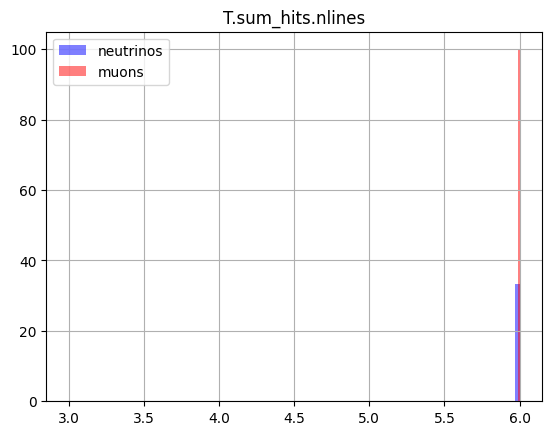

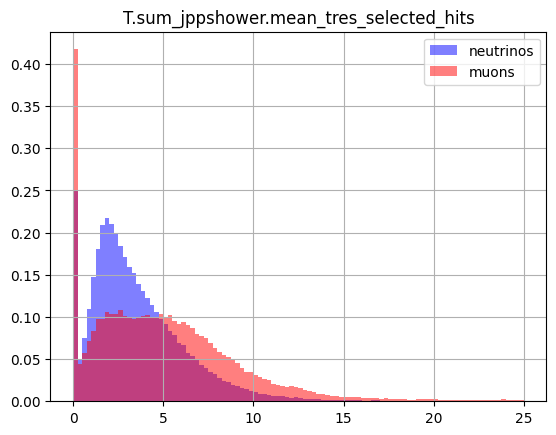

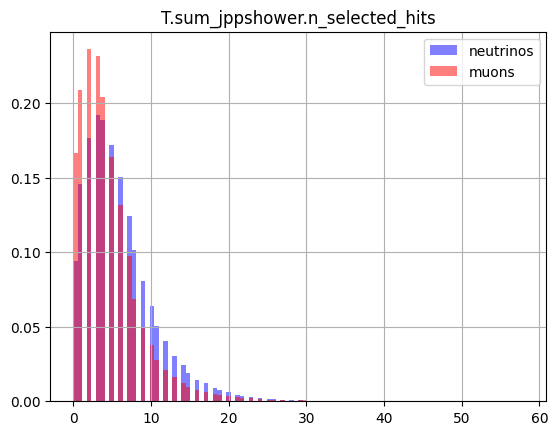

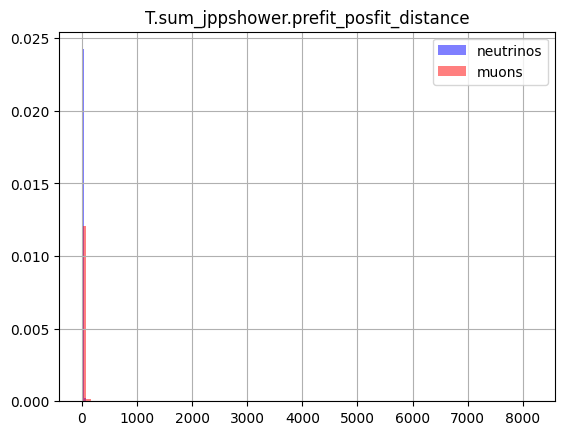

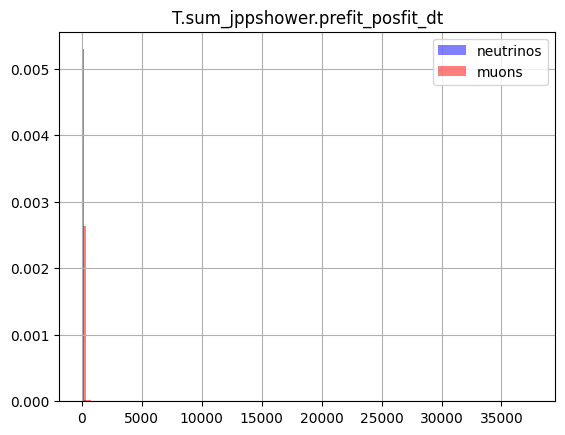

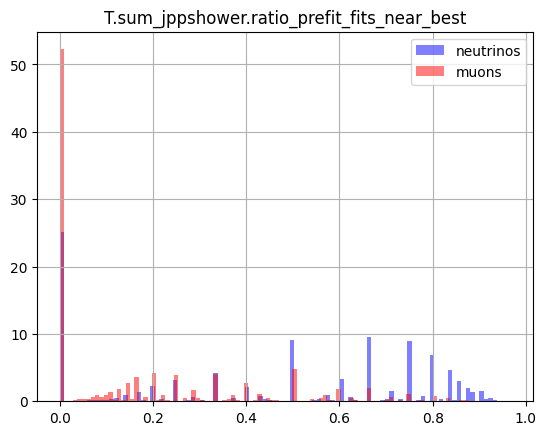

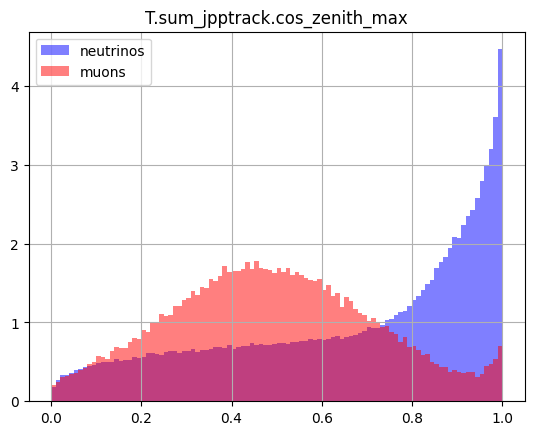

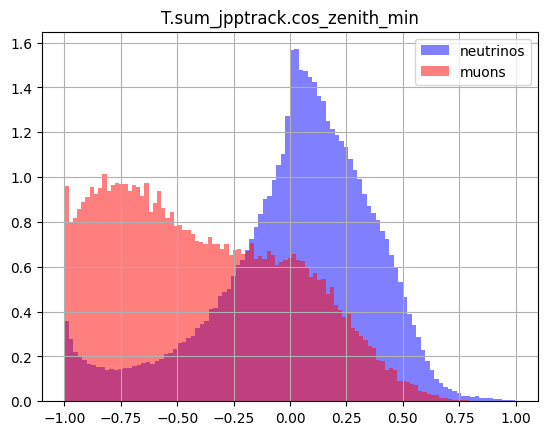

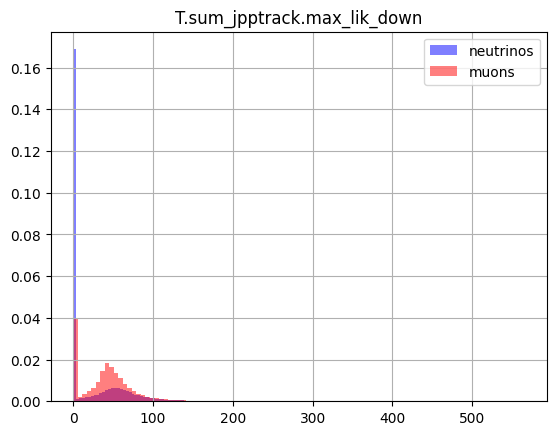

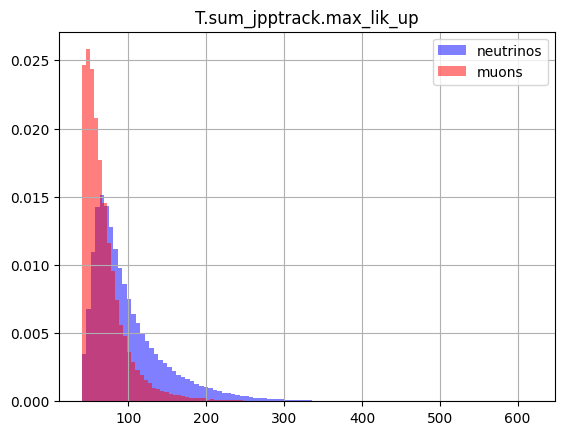

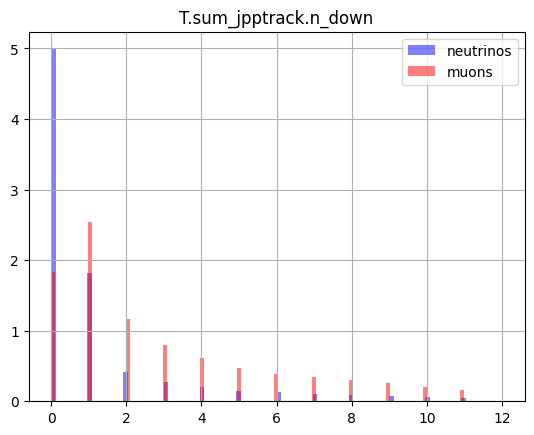

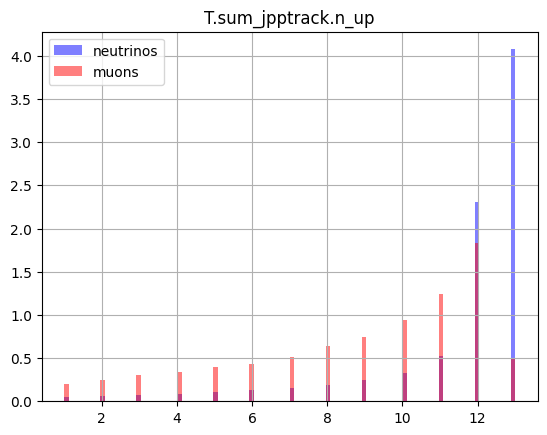

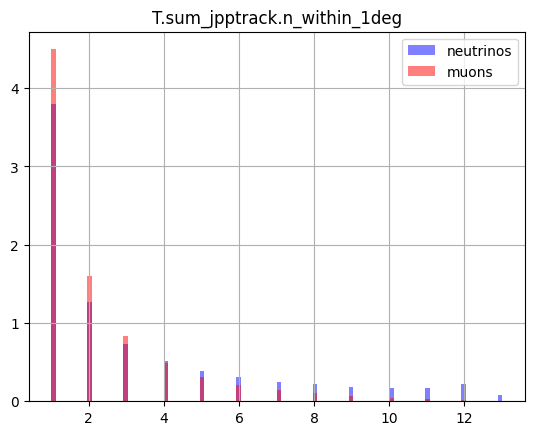

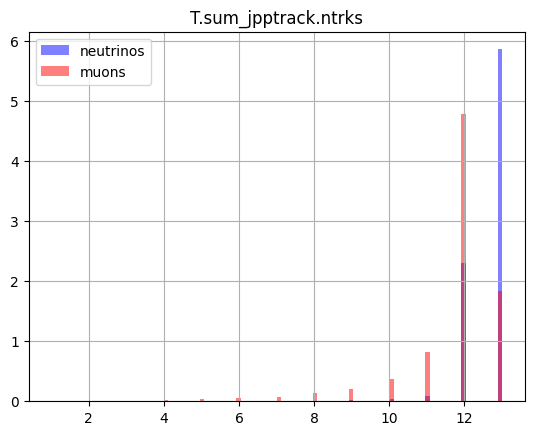

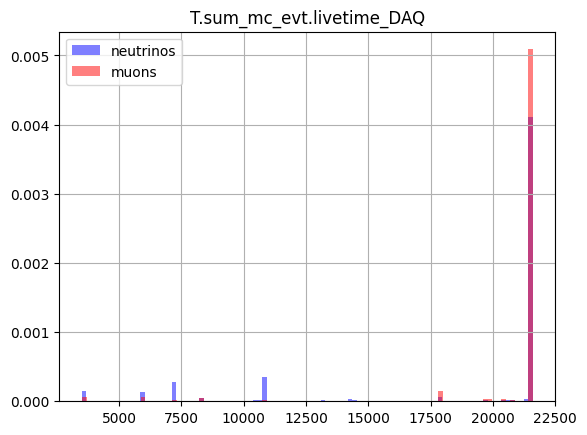

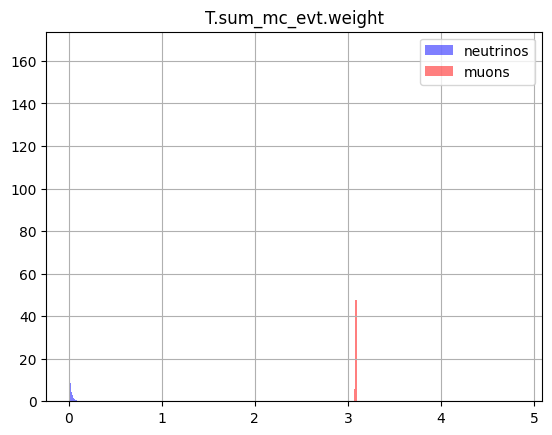

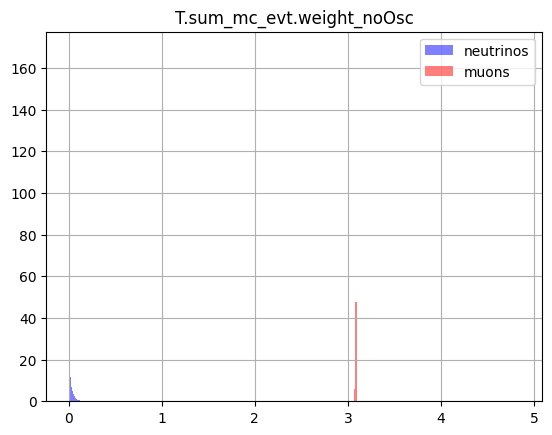

/home/jbosman/NIKHEF_repo/venv/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


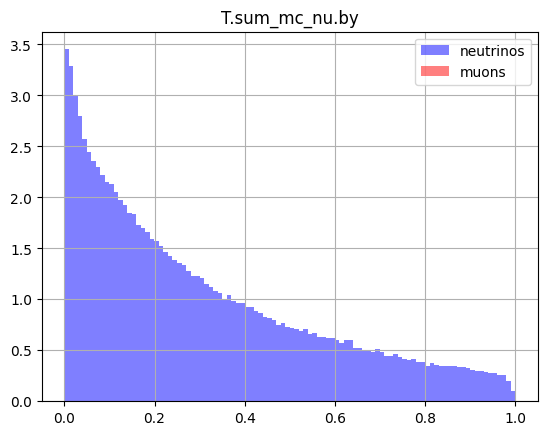

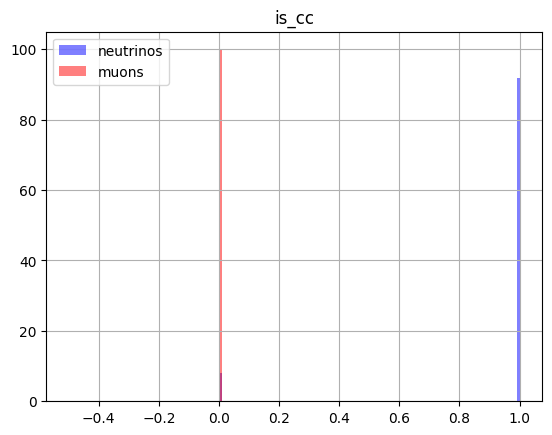

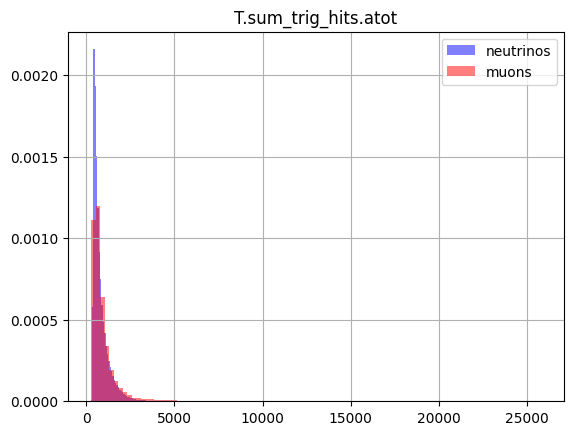

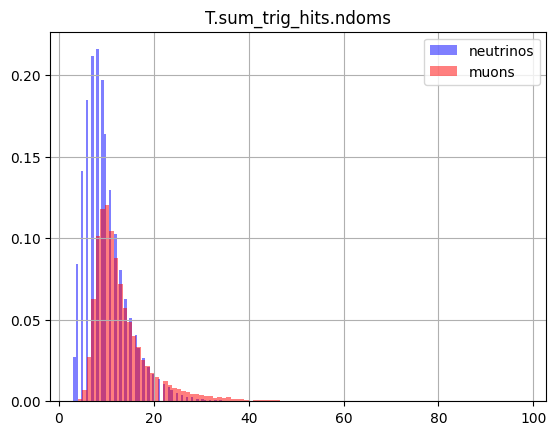

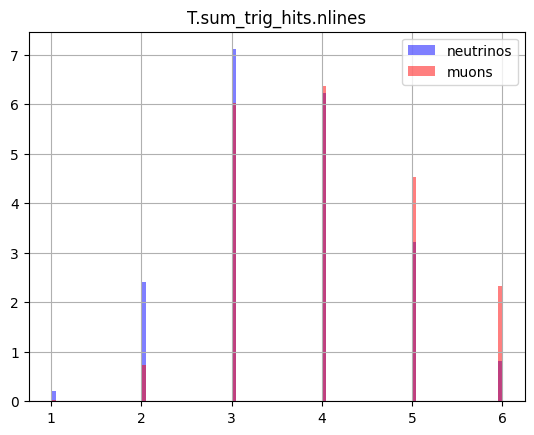

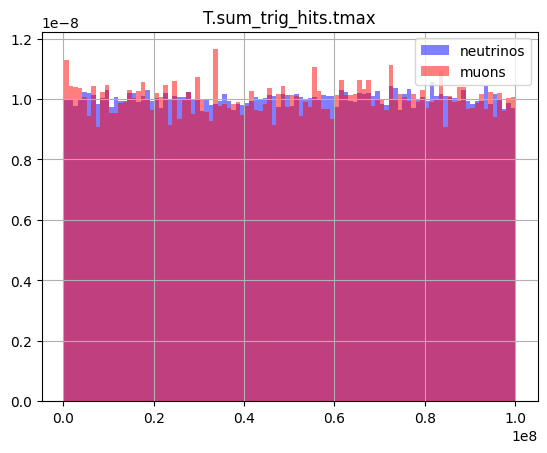

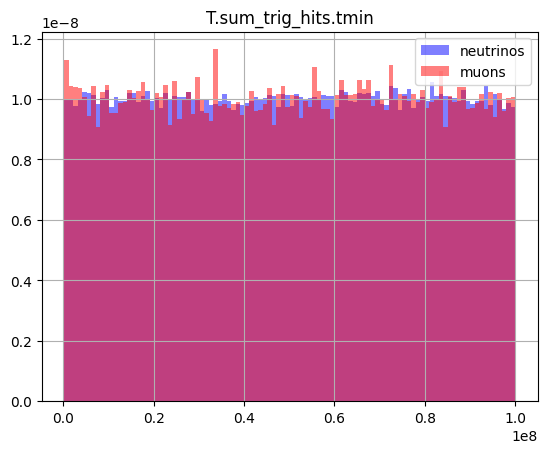

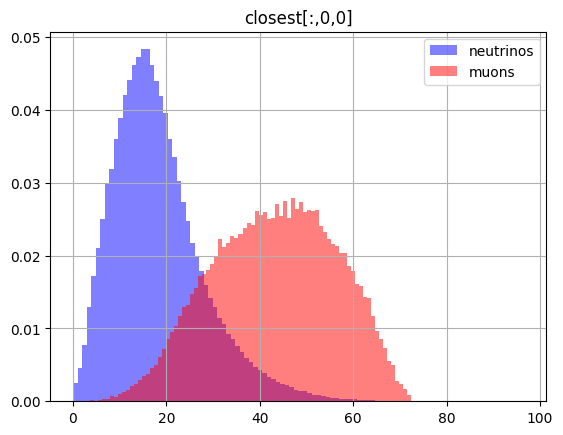

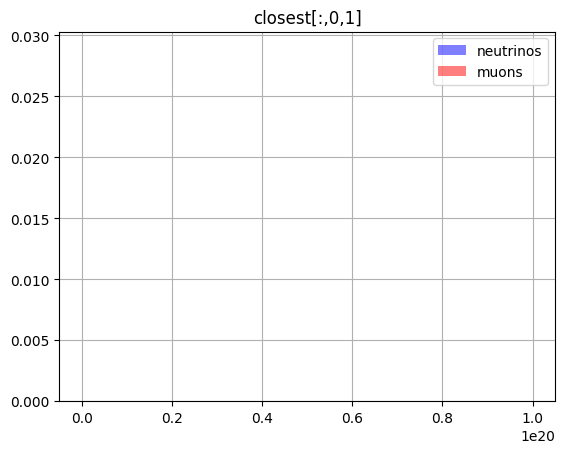

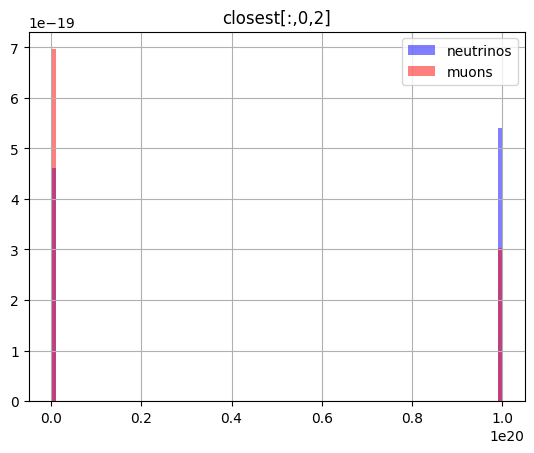

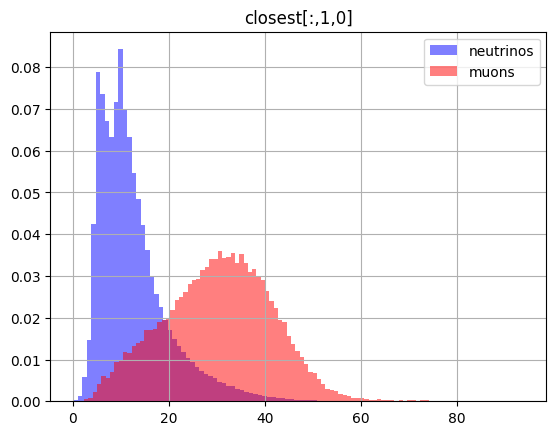

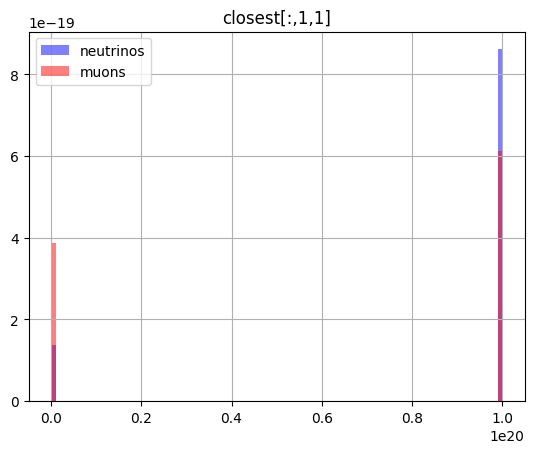

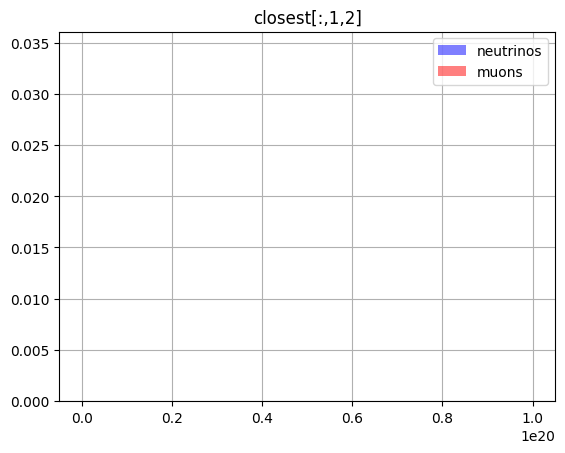

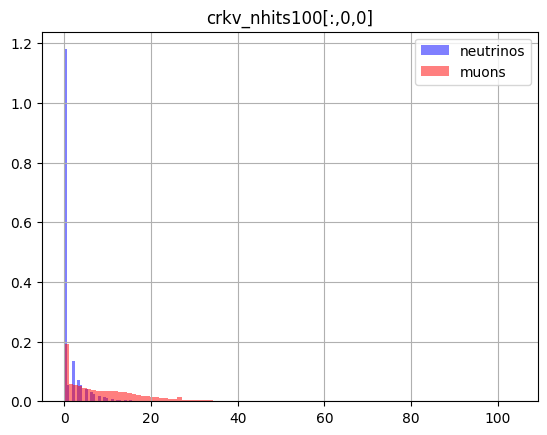

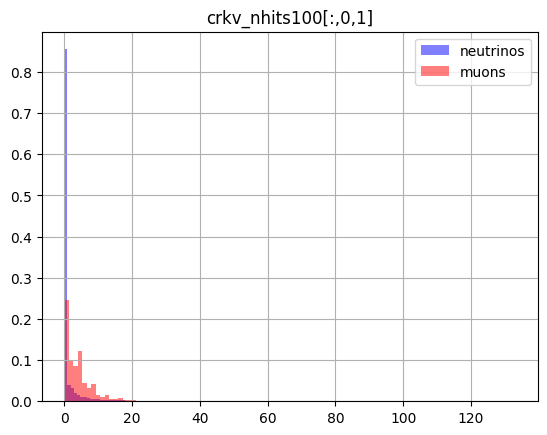

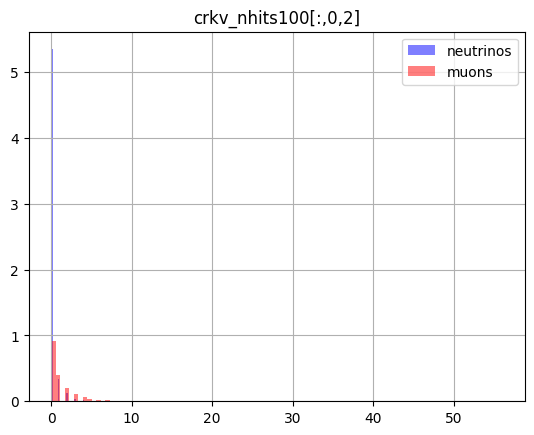

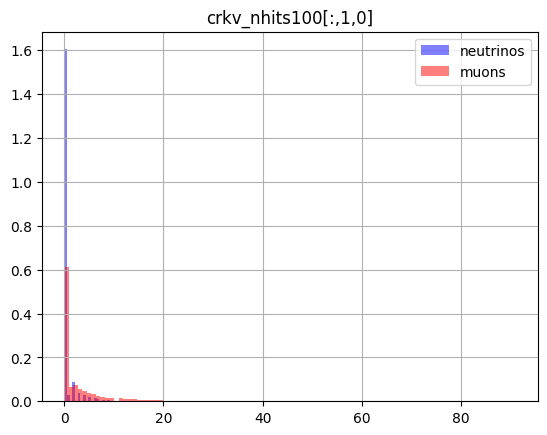

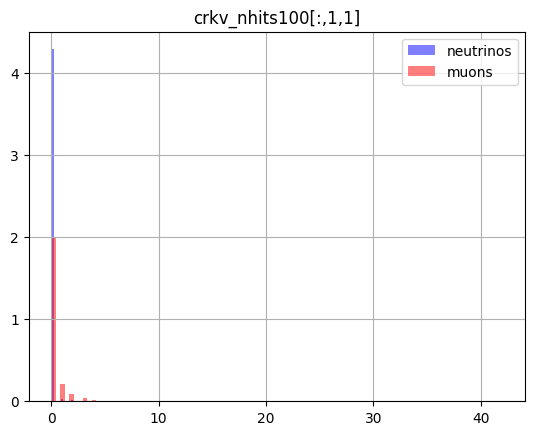

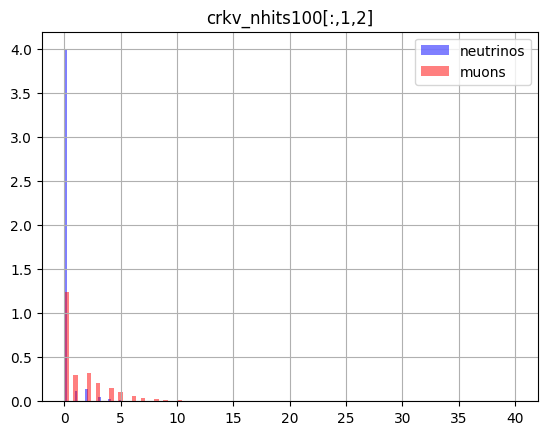

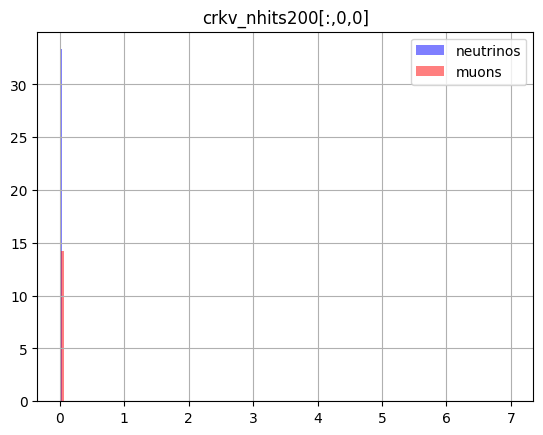

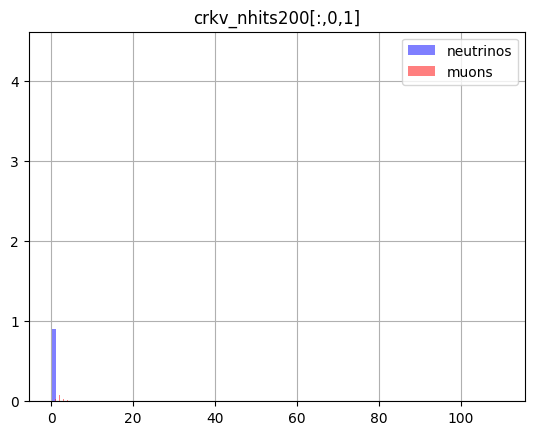

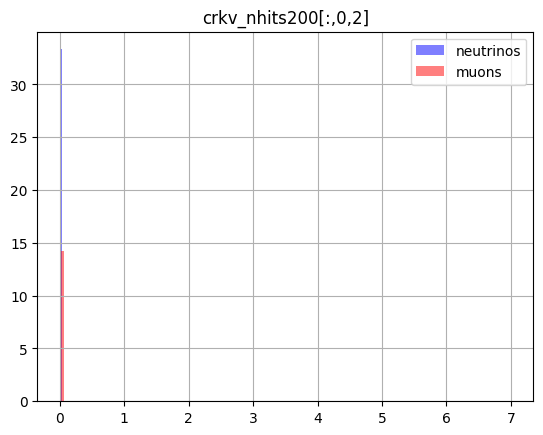

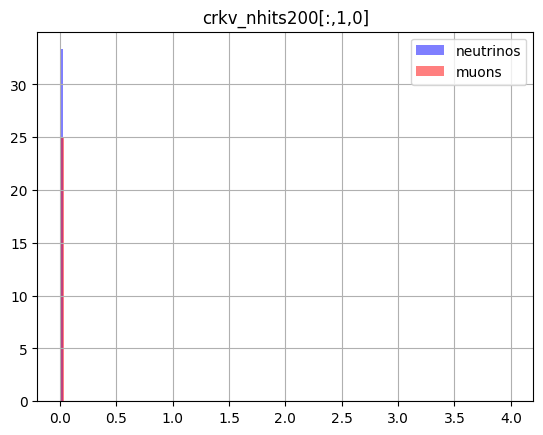

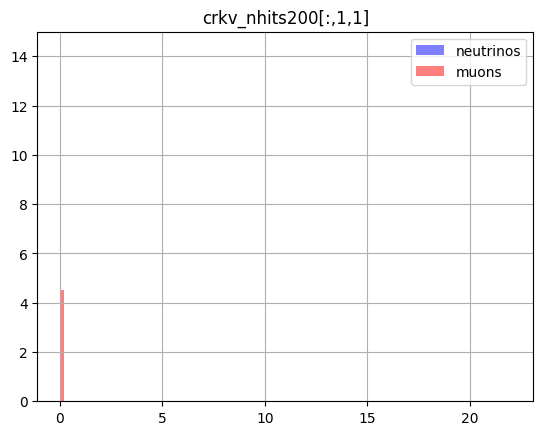

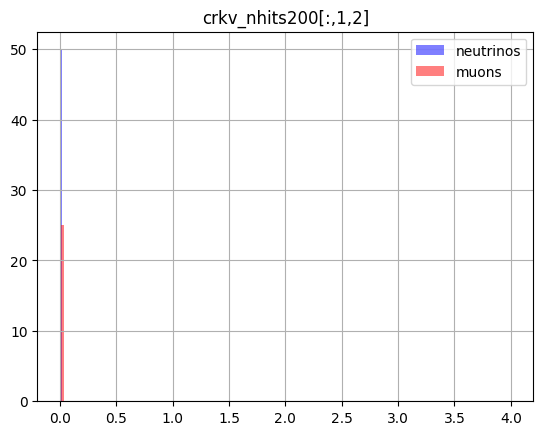

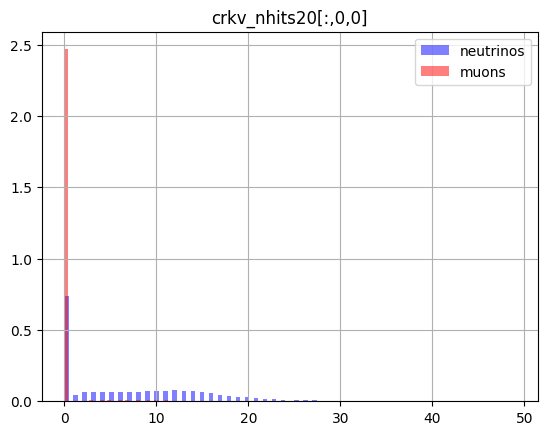

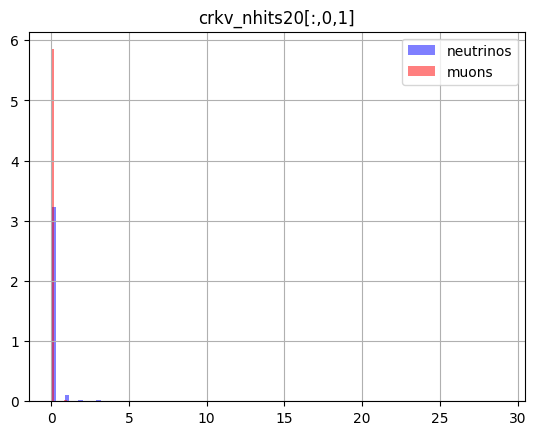

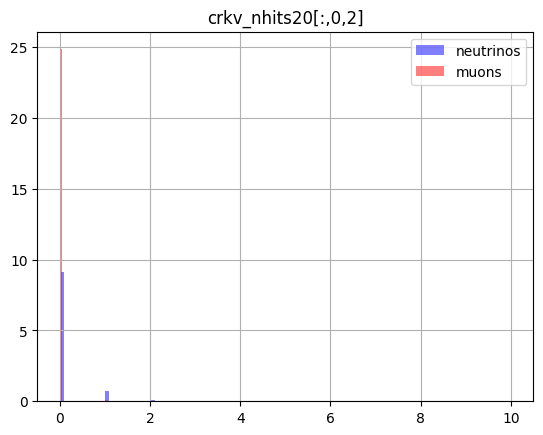

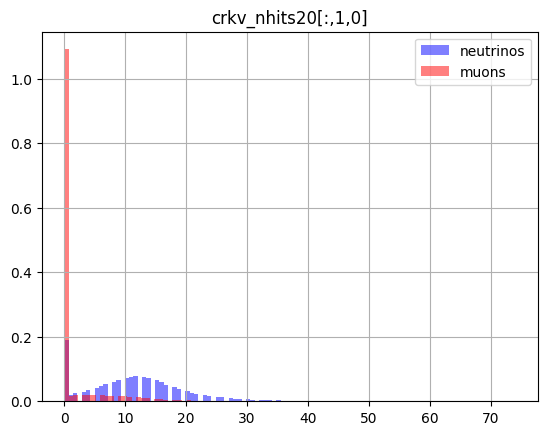

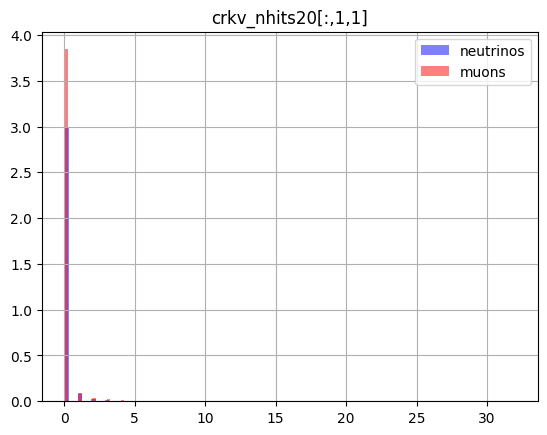

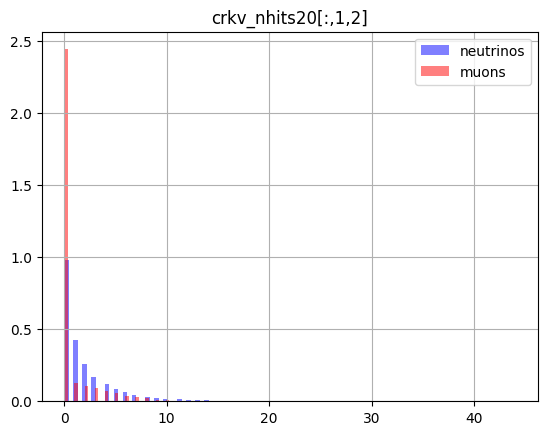

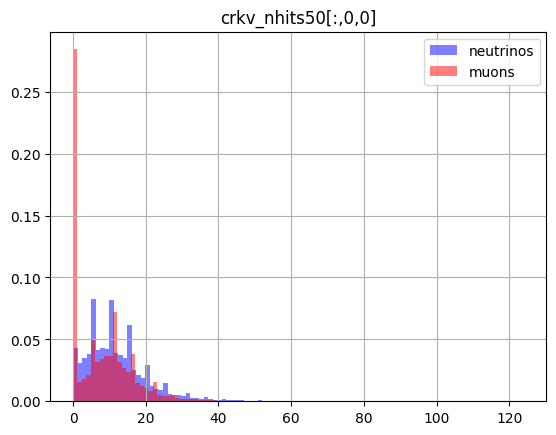

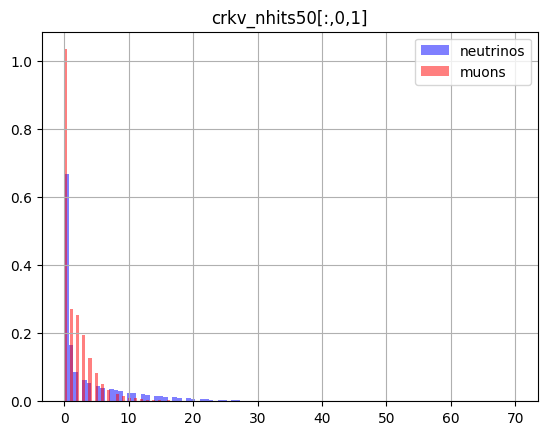

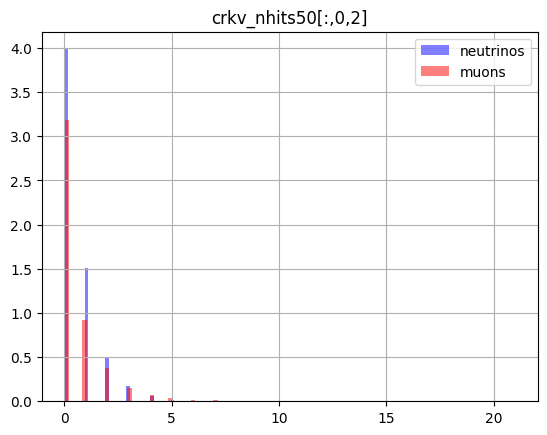

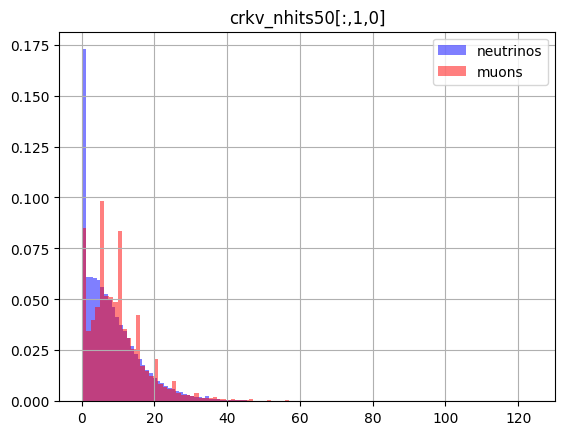

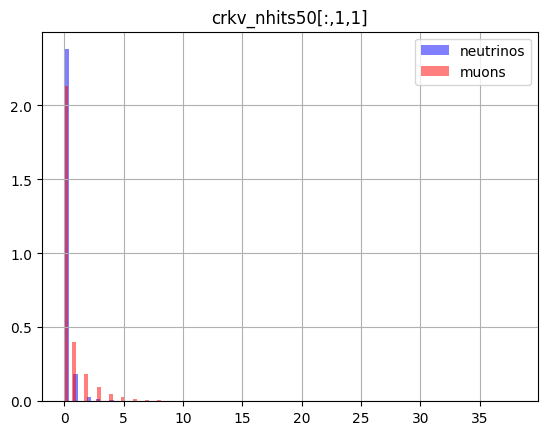

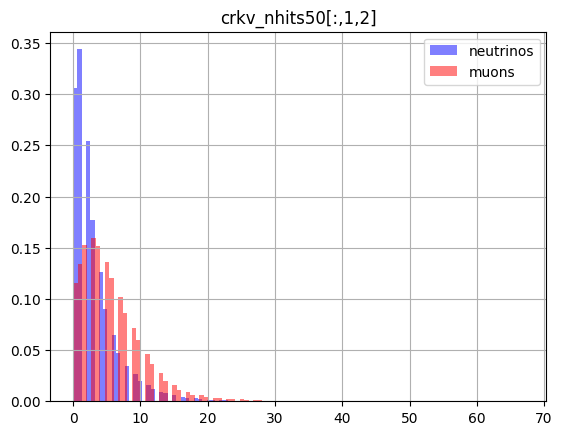

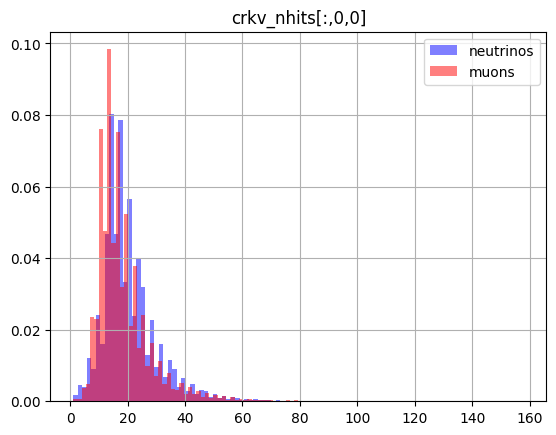

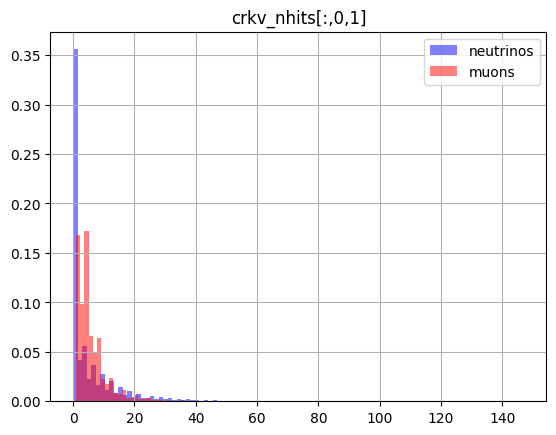

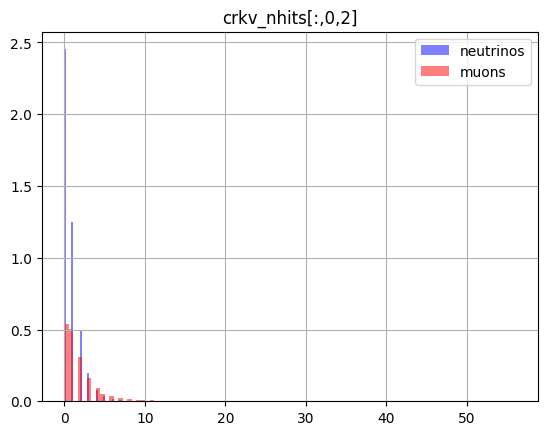

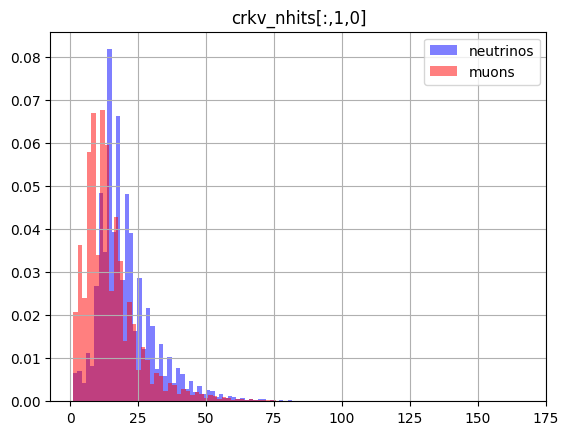

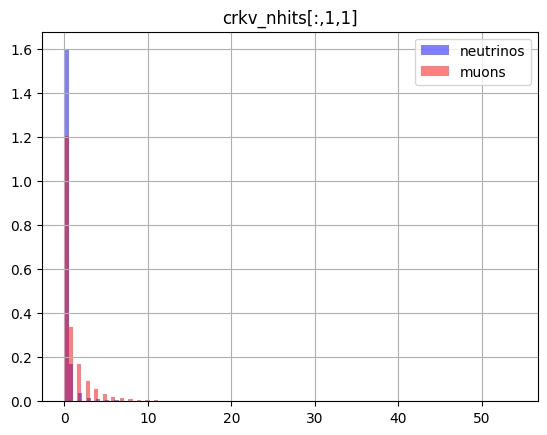

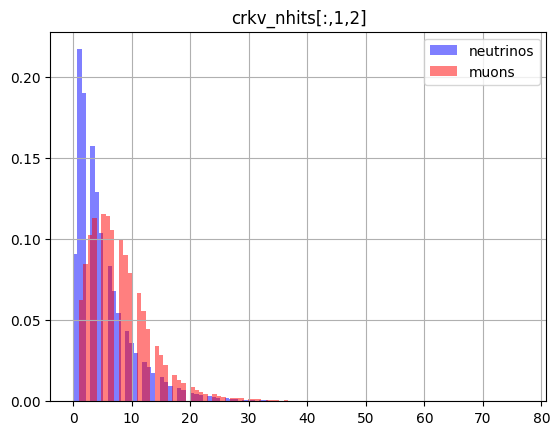

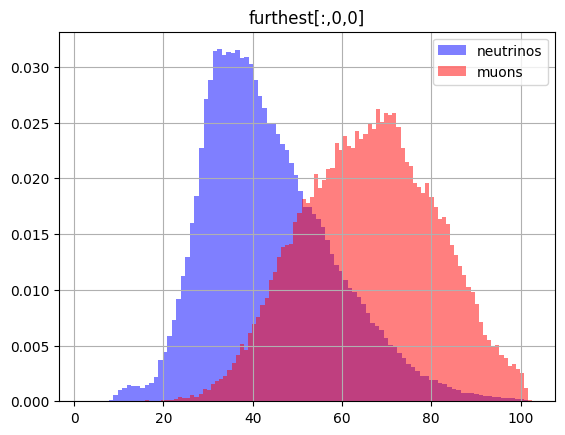

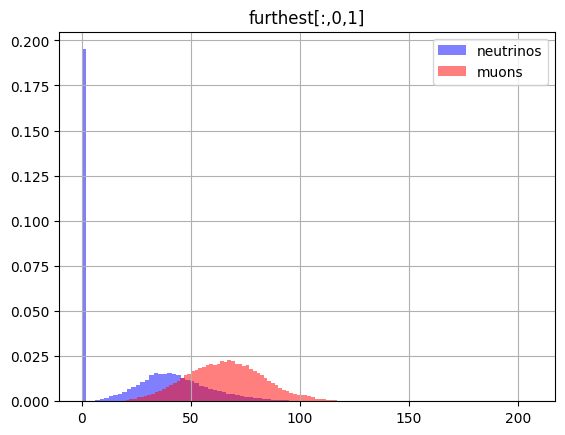

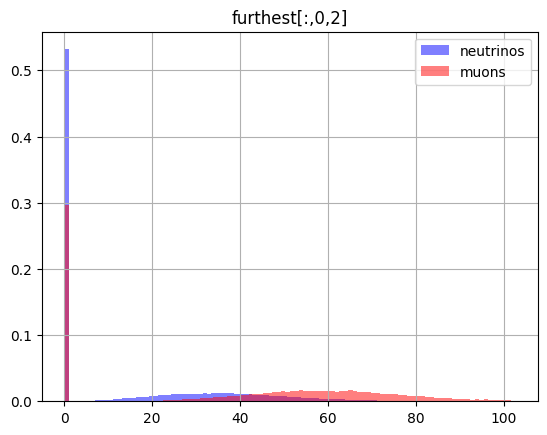

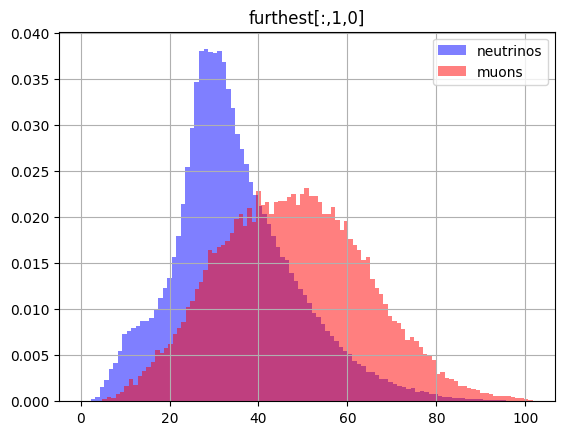

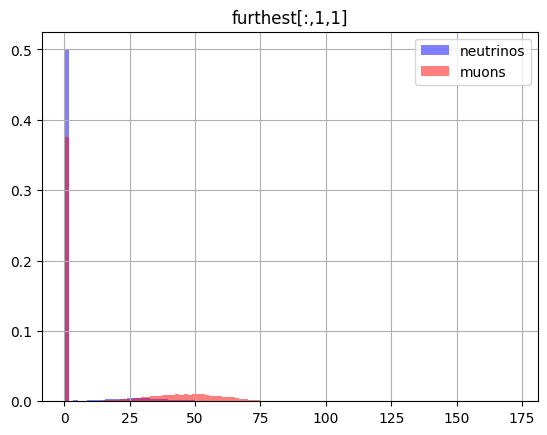

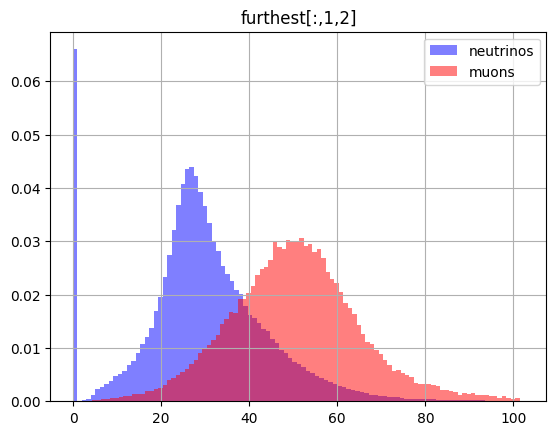

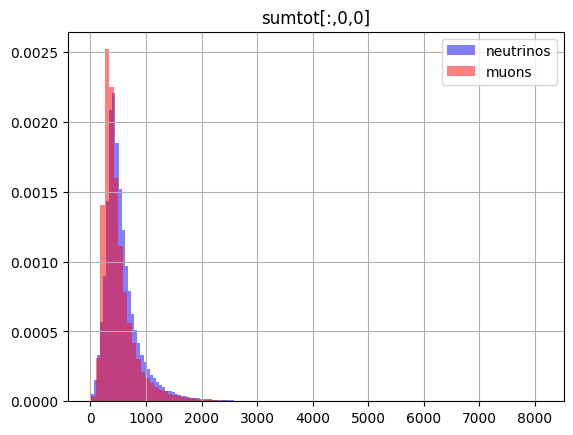

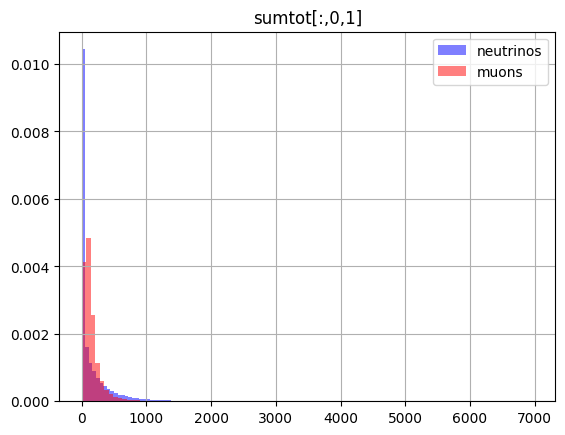

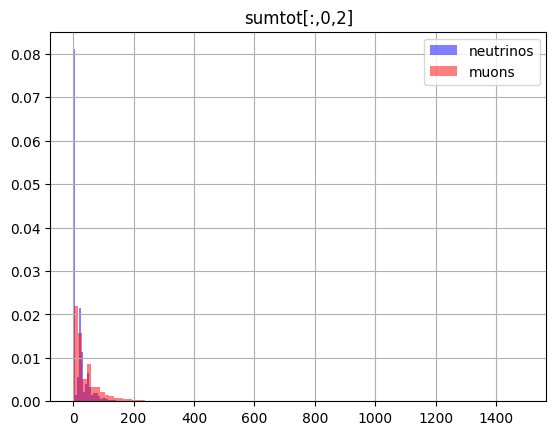

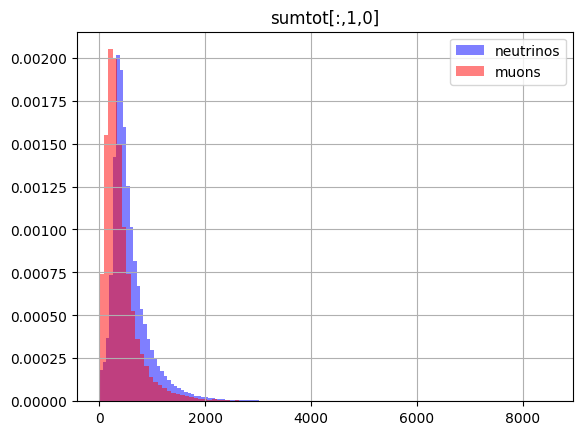

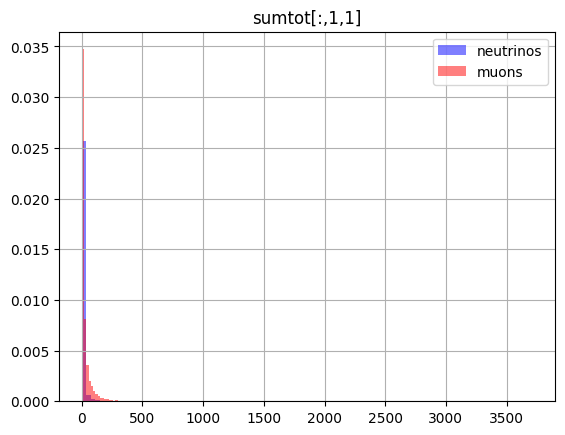

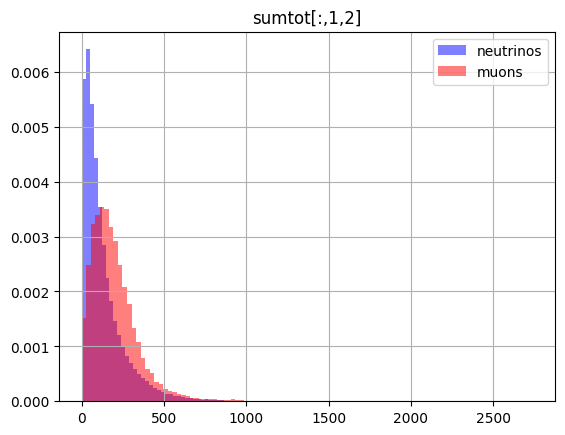

/home/jbosman/NIKHEF_repo/venv/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges


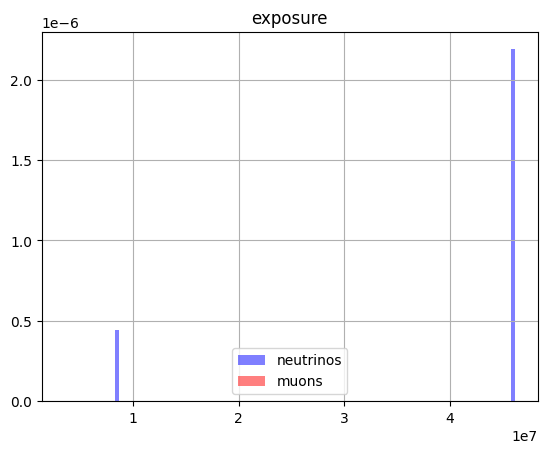

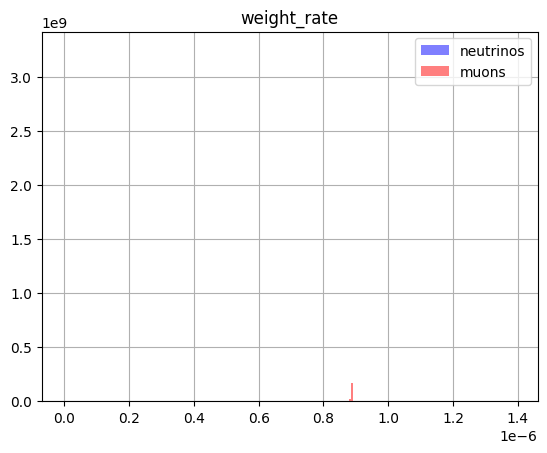

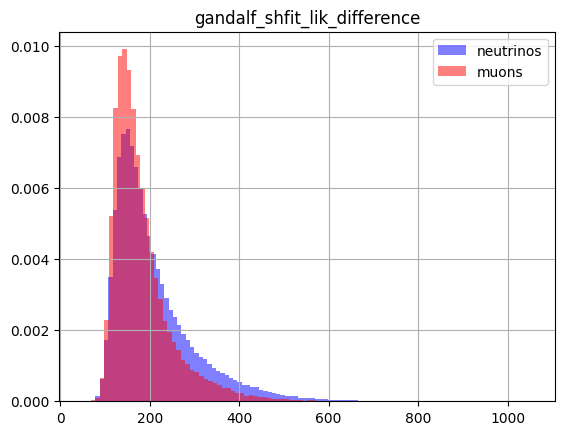

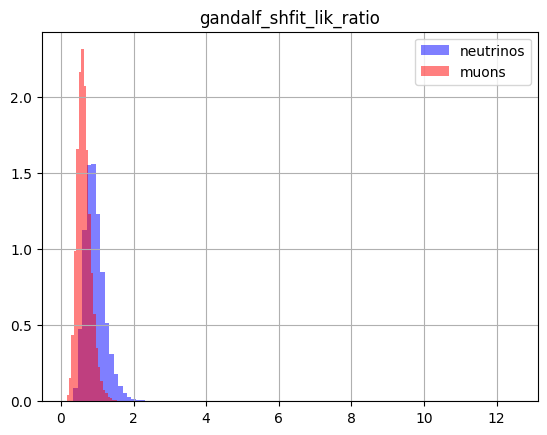

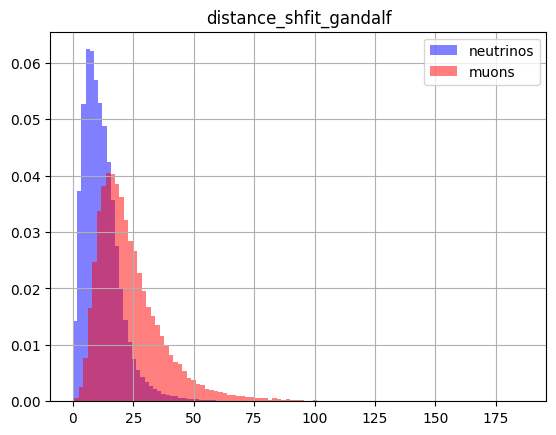

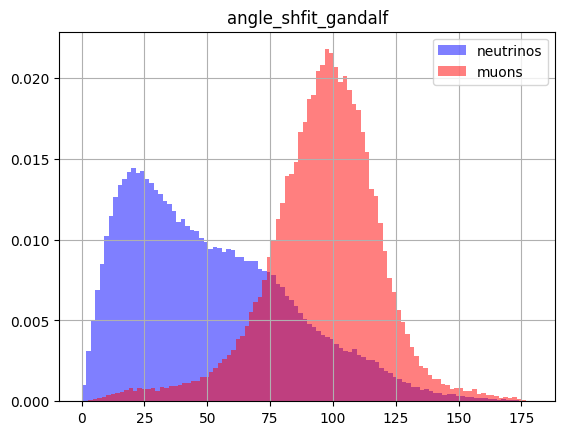

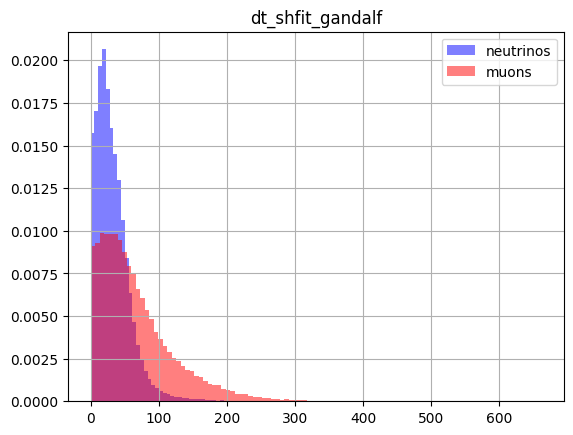

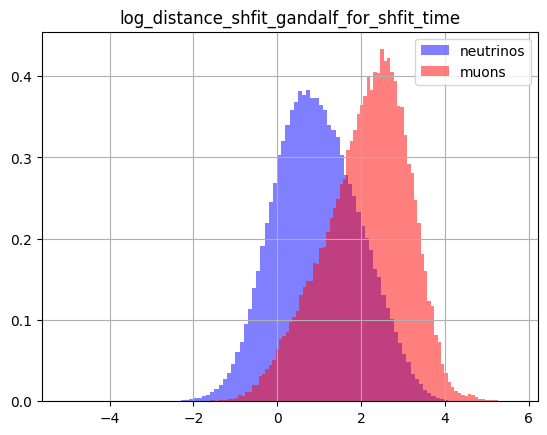

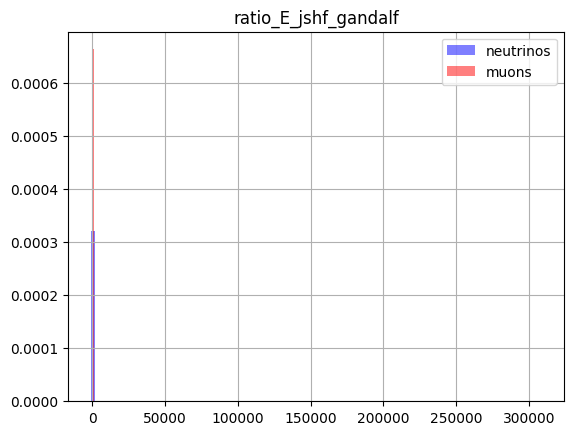

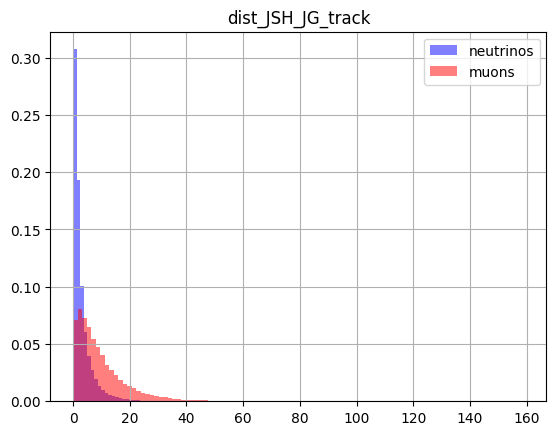

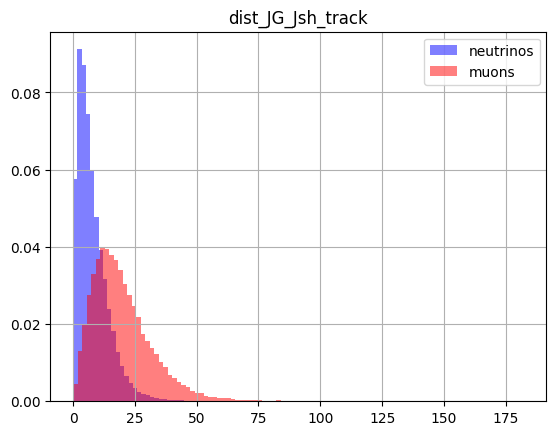

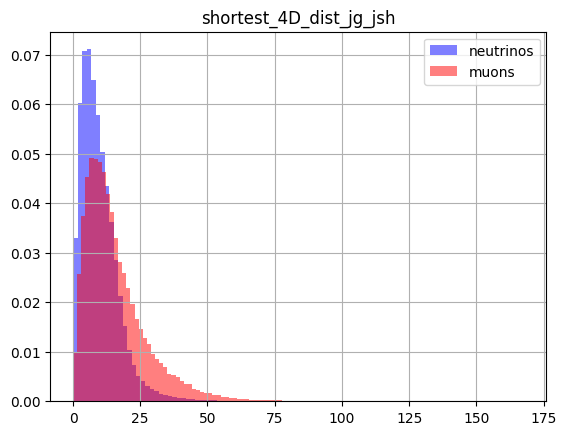

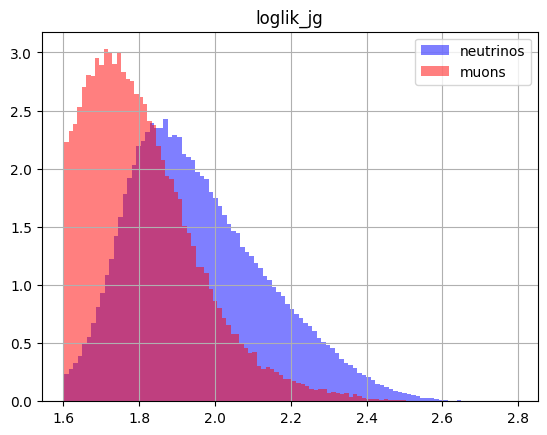

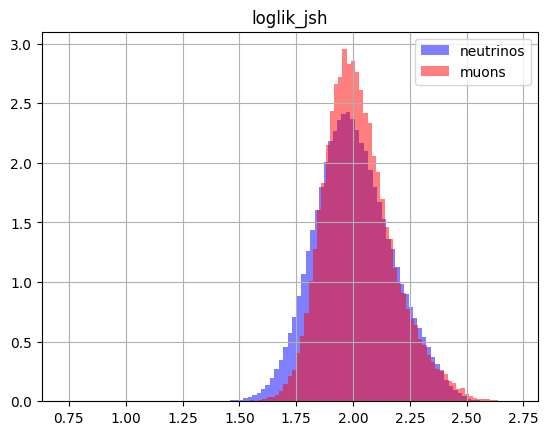

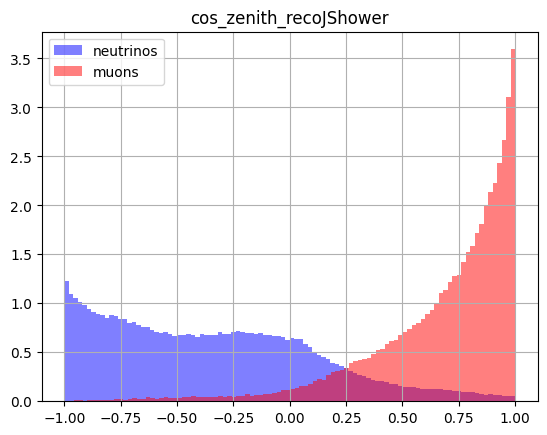

RGS_shower_tau
muons
RGS_shower_tau
False    55698
True      2262
Name: count, dtype: int64
neutrinos
RGS_shower_tau
False    175370
True     129852
Name: count, dtype: int64
RGS_track_tau
muons
RGS_track_tau
True     52682
False     5278
Name: count, dtype: int64
neutrinos
RGS_track_tau
False    212171
True      93051
Name: count, dtype: int64
RGS_track_std
muons
RGS_track_std
True     53428
False     4532
Name: count, dtype: int64
neutrinos
RGS_track_std
False    197170
True     108052
Name: count, dtype: int64


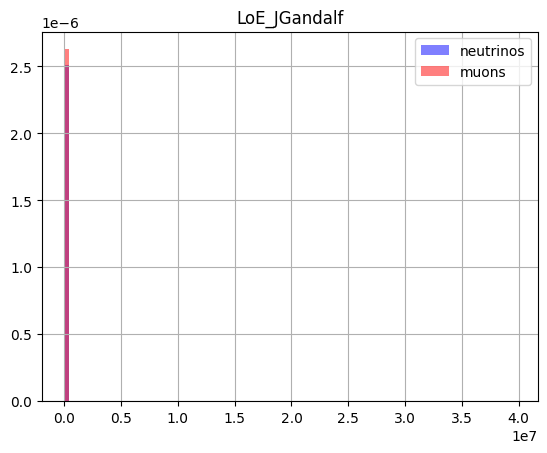

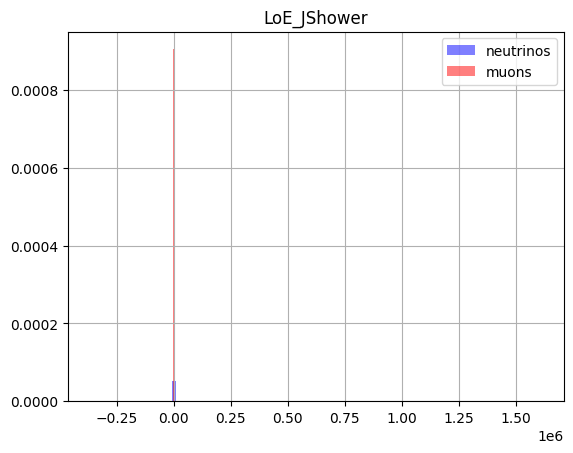

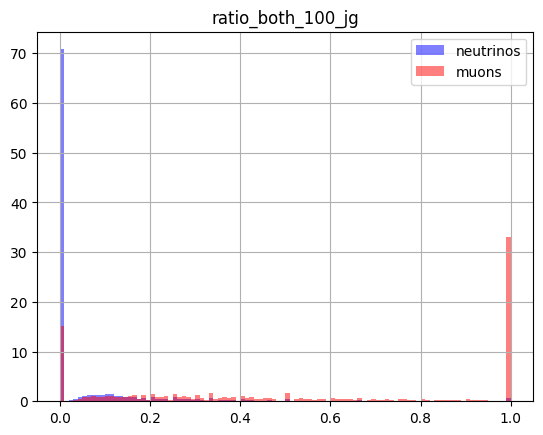

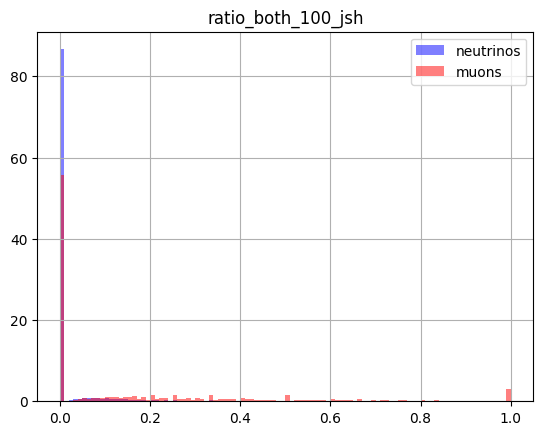

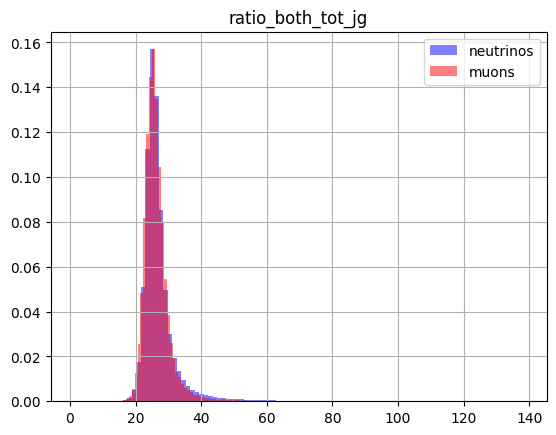

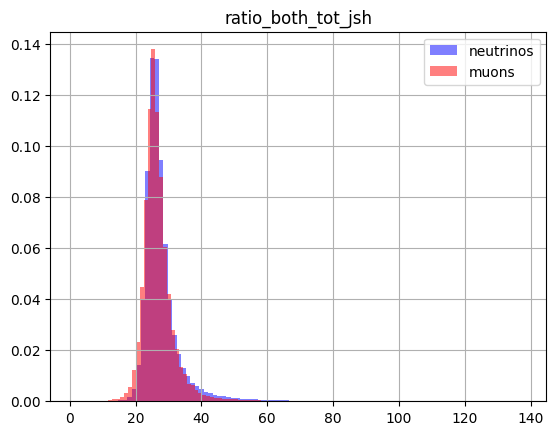

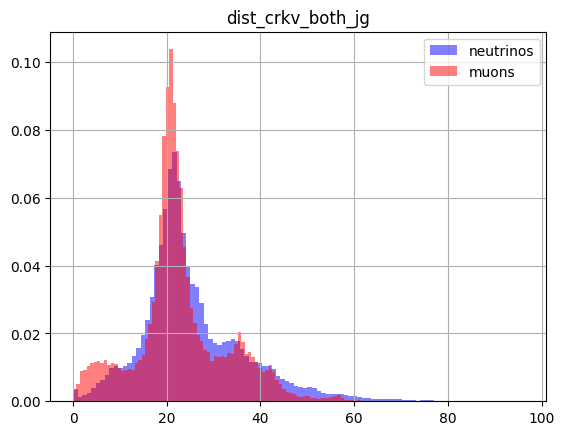

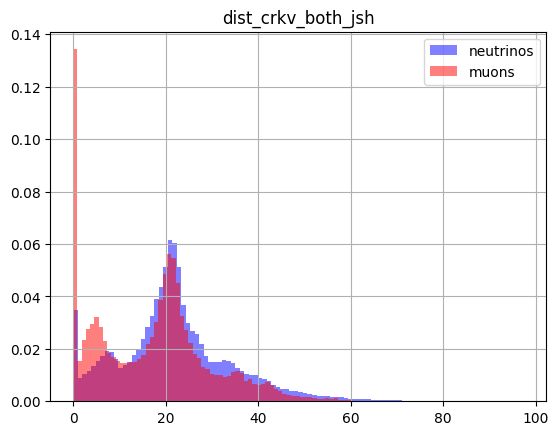

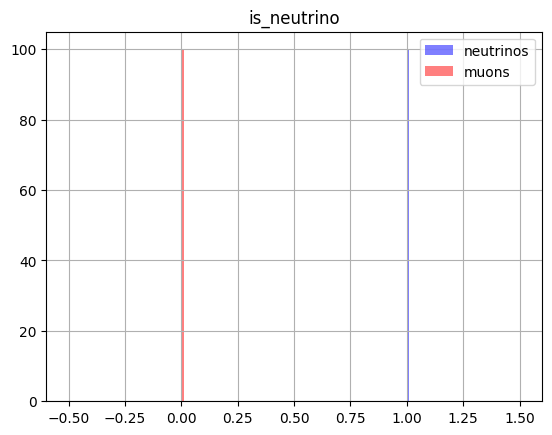

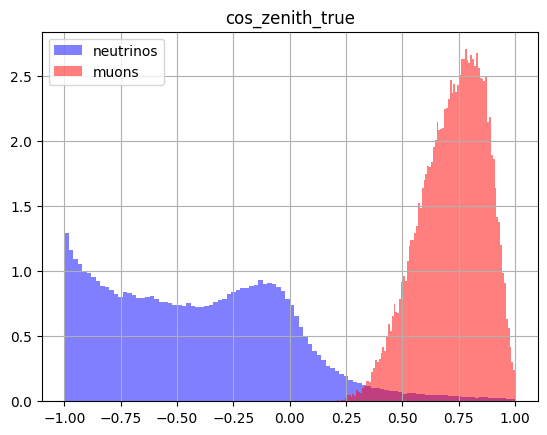

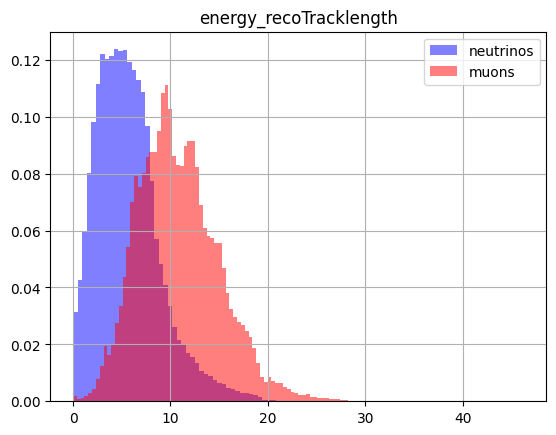

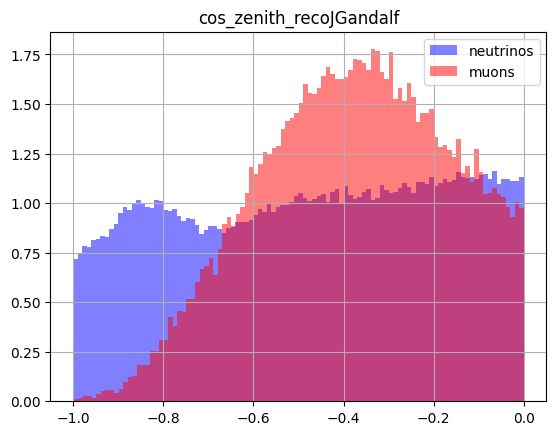

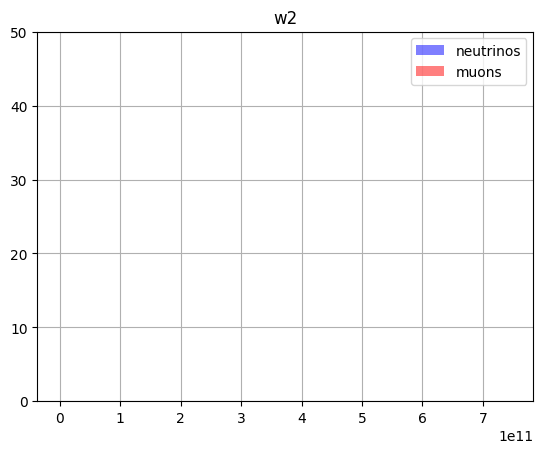

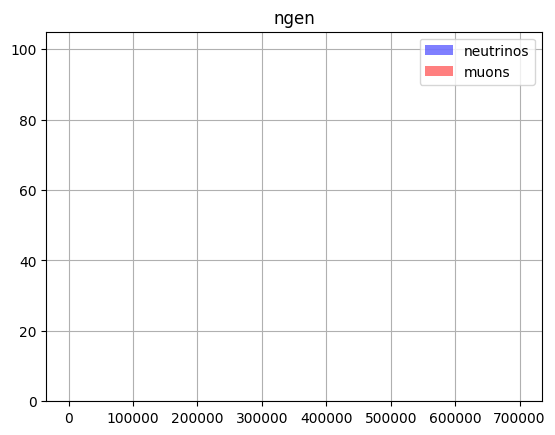

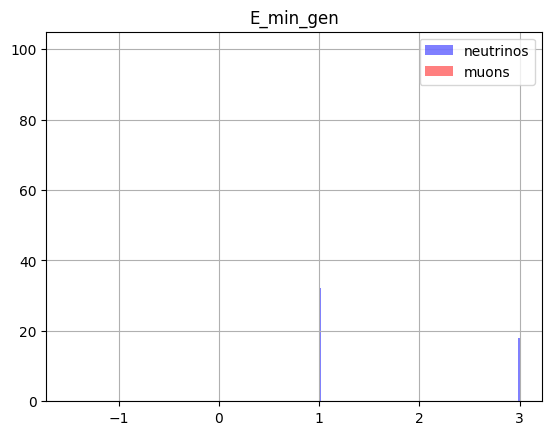

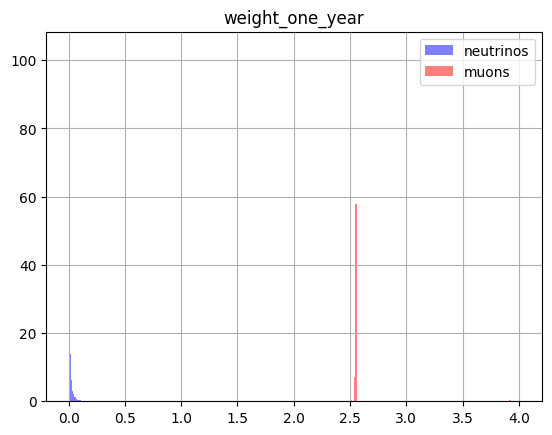

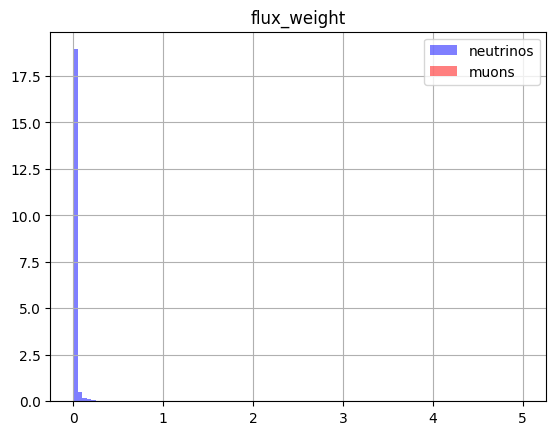

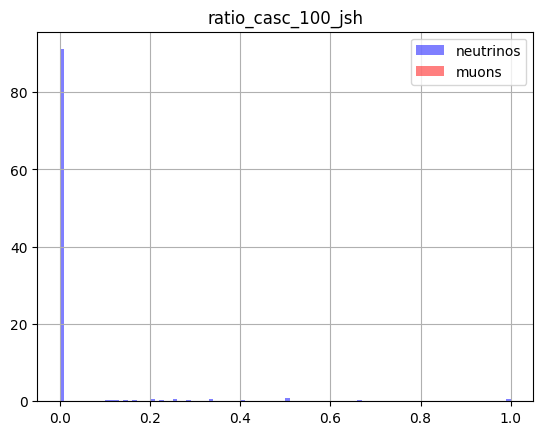

In [5]:
neutrino_mask = df["is_neutrino"]==1
muon_mask = df["is_neutrino"]==0
for column in df.columns:
    if df[column].dtype == np.bool_:
        print(column)
        print("muons")
        print(df[muon_mask][column].value_counts())
        print("neutrinos")
        print(df[neutrino_mask][column].value_counts())
    else:
        if column == "energy" or column == "E.trks.E[:,0]" or column == "E.trks.E[:,1]":
            hist_neutrinos = df[neutrino_mask][column].hist(bins=100, alpha=0.5, color="blue", label="neutrinos", log = True, density = True)
            hist_muons = df[muon_mask][column].hist(bins=100, alpha=0.5, color="red", label="muons", log = True, density = True)
            
        else:
            hist_neutrinos = df[neutrino_mask][column].hist(bins=100, alpha=0.5, color="blue", label="neutrinos", density = True)
            hist_muons = df[muon_mask][column].hist(bins=100, alpha=0.5, color="red", label="muons", density = True)
        # fig = hist.get_figure()
        plt.legend()
        plt.title(column)
        plt.show()


### Bjorkeny

In [ ]:
neutrino_mask = df["is_neutrino"]==1
smaller_05_mask = df["T.sum_mc_nu.by"]<0.5
larger_05_mask = df["T.sum_mc_nu.by"]>=0.5
for column in df.columns:
    if df[column].dtype == np.bool_:
        print(column)
        print("bjorkeny $<$ 0.5")
        print(df[neutrino_mask & smaller_05_mask][column].value_counts())
        print("bjorkeny $\geq$ 0.5")
        print(df[neutrino_mask & larger_05_mask][column].value_counts())
    else:
        if column == "energy" or column == "E.trks.E[:,0]" or column == "E.trks.E[:,1]":
            hist_smaller = df[neutrino_mask & smaller_05_mask][column].hist(bins=100, alpha=0.5, color="blue", label="bjorkeny $<$ 0.5", log = True, density = True)
            hist_larger = df[neutrino_mask & larger_05_mask][column].hist(bins=100, alpha=0.5, color="red", label="bjorkeny $\geq$ 0.5", log = True, density = True)
            
        else:
            hist_smaller = df[neutrino_mask & smaller_05_mask][column].hist(bins=100, alpha=0.5, color="blue", label="bjorkeny $<$ 0.5", density = True)
            hist_larger = df[neutrino_mask & larger_05_mask][column].hist(bins=100, alpha=0.5, color="red", label="bjorkeny $\geq$ 0.5", density = True)
        # fig = hist.get_figure()
        plt.legend()
        plt.title(column)
        plt.show()


## individual plots for weird looking histograms


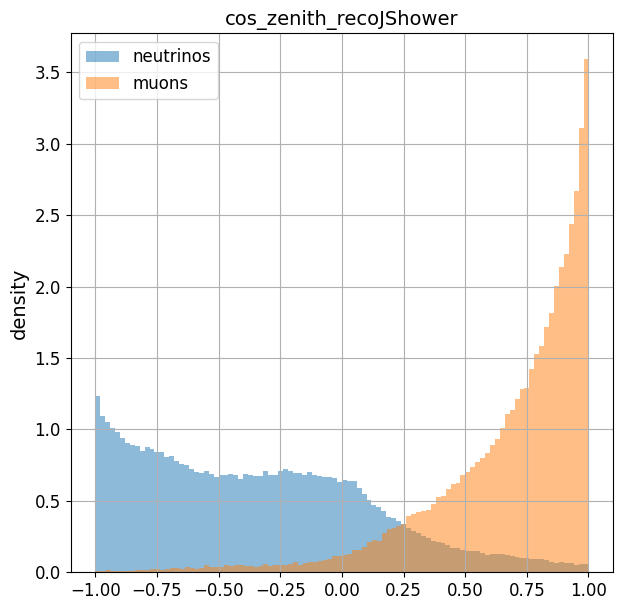

In [35]:
column = "cos_zenith_recoJShower"
neutrino_mask = (df["is_neutrino"]==1)

muon_mask = (df["is_neutrino"]==0) 
save_fig = False
log = False


hist_neutrinos = df[neutrino_mask][column].hist(bins=100, alpha = 0.5, density = True, log = log, label = "neutrinos")
hist_muons = df[muon_mask][column].hist(bins=100, alpha = 0.5, density = True, log = log, label = "muons")
plt.ylabel("density")
plt.title(column)
plt.legend()
if save_fig:
    plt.savefig("/home/jbosman/NIKHEF_repo/figures_classification/figures_E_less_20/upgoing/histogram_muons_and_neutrinos_"+column+".png")
plt.show()


# hist_muons = df[muon_mask][column].hist(bins=100, density = True, color = "orange", log = log, label = "muons")
# plt.ylabel("density")
# plt.title(column+ " muons")
# if save_fig:
#     plt.savefig("/home/jbosman/NIKHEF_repo/figures_classification/figures_E_less_20/upgoing/histogram_muons_"+column+".png")
# plt.show()

# hist_neutrinos = df[neutrino_mask][column].hist(bins=100, density = True, log = log, label = "neutrinos")
# plt.ylabel("density")
# plt.title(column)
# if save_fig:
#     plt.savefig("/home/jbosman/NIKHEF_repo/figures_classification/figures_E_less_20/upgoing/histogram_neutrinos_"+column+".png")
# plt.show()



## Look at phase space classification

363182


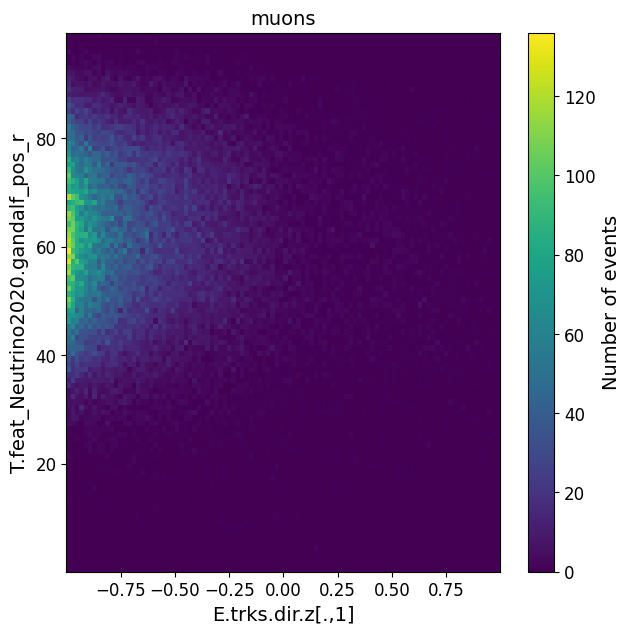

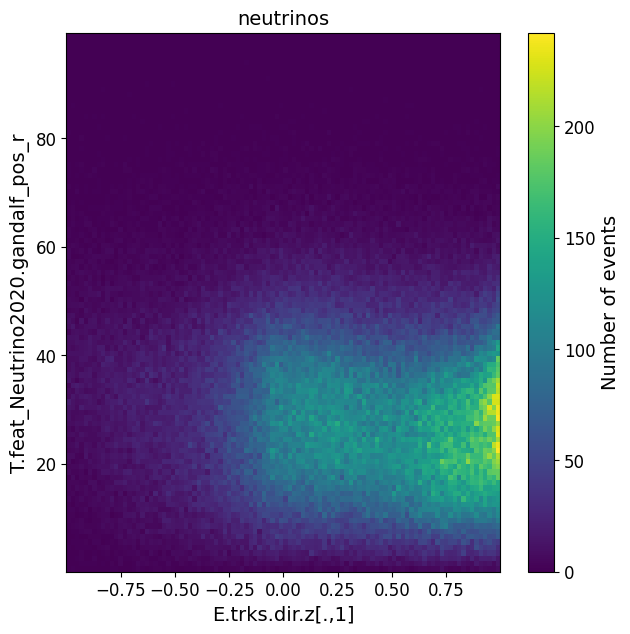

In [17]:

# most important columns according to base classifier for classification with dir_z>0
# 1. feature LoE_JShower (0.100107)
# 2. feature E.trks.dir.z[:,1] (0.086440)
# 3. feature T.feat_Neutrino2020.QupOvernHits (0.078293)
# 4. feature cos_zenith_recoJShower (0.076029)
# 5. feature T.feat_Neutrino2020.gandalf_pos_r (0.061045)
# 6. feature ratio_casc_100_jsh (0.054969)
# 7. feature closest[:,0,0] (0.045861)
# 8. feature E.trks.E[:,1] (0.037244)
# 9. feature T.feat_Neutrino2020.cherCond_n_hits_trig_dnMup (0.034855)
# 10. feature closest[:,1,0] (0.021439)
# 11. feature T.feat_Neutrino2020.cherCond_n_hits_dnMup (0.021123)
# 12. feature ratio_both_100_jg (0.020734)
# 13. feature furthest[:,0,1] (0.018996)
# 14. feature RGS_track_tau (0.017473)
# 15. feature crkv_nhits20[:,1,0] (0.016302)
# 16. feature angle_shfit_gandalf (0.014163)
# 17. feature T.feat_Neutrino2020.cherCond_hits_trig_meanZposition (0.012787)
# 18. feature ratio_E_jshf_gandalf (0.012112)
# 19. feature crkv_nhits100[:,0,1] (0.011828)
# 20. feature energy_recoTracklength (0.010882)


print(len(df))

column_1 = "E.trks.dir.z[.,1]"
column_2 = "T.feat_Neutrino2020.gandalf_pos_r"

col_1_log = False
col_2_log = False

min1 = np.min(df[column_1])
max1 = np.max(df[column_1])
min2 = np.min(df[column_2])
max2 = np.max(df[column_2])

save_plot = True



for label in [0,1]:
    if label == 0:
        mask = df["is_neutrino"] == label
        label_name = "muons"
    else:
        mask = df["is_neutrino"] == label
        label_name = "neutrinos"


    hist = plt.hist2d(df[mask][column_1], df[mask][column_2], bins=100, cmap='viridis', range=[[min1, max1], [min2, max2]])
    colorbar = plt.colorbar(hist[3])
    colorbar.set_label('Number of events')
    plt.xlabel(column_1)
    if col_1_log:
        plt.xscale("log")
    plt.ylabel(column_2)
    if col_2_log:
        plt.yscale("log")
    plt.title(label_name)

    # Set the font size for the tick labels
    if save_plot:
        plt.savefig("figures_classification/figures_E_less_20/upgoing/2d_histogram_"+label_name+"_"+column_1+"_"+column_2+".png")
    plt.show()



## phase space for bjorkeny

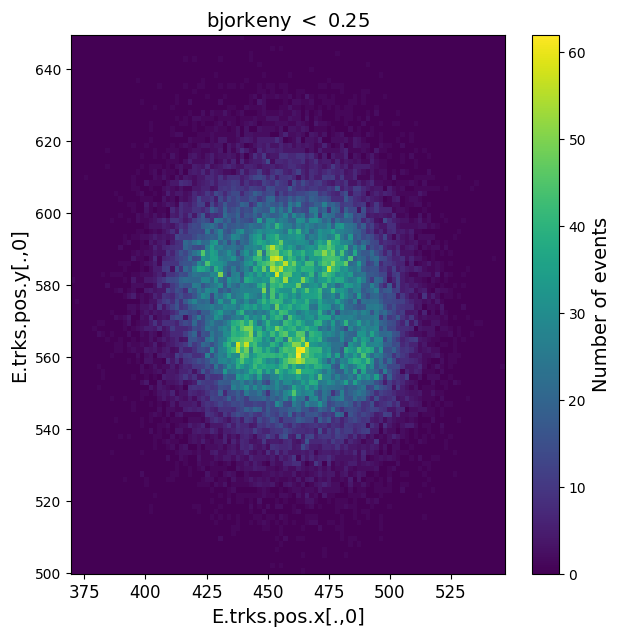

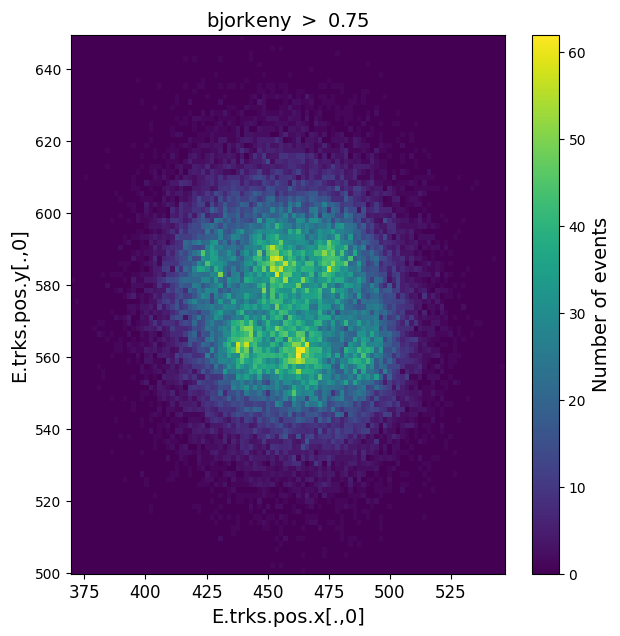

In [9]:
# most important columns according to base classifier for Bjrokeny y
# 1. feature T.sum_jppshower.prefit_posfit_distance (0.037915)
# 2. feature gandalf_shfit_lik_ratio (0.028620)
# 3. feature E.trks.fitinf[:,0,5] (0.028572)
# 4. feature RGS_track_tau (0.022123)
# 5. feature crkv_nhits50[:,0,0] (0.020021)
# 6. feature angle_shfit_gandalf (0.018925)
# 7. feature T.feat_Neutrino2020.QupOvernHits (0.018615)
# 8. feature ratio_both_tot_jg (0.017532)
# 9. feature T.sum_jpptrack.n_within_1deg (0.017132)
# 10. feature T.sum_jppshower.ratio_prefit_fits_near_best (0.016258)
# 11. feature dt_shfit_gandalf (0.016168)
# 12. feature ratio_E_jshf_gandalf (0.015001)
# 13. feature E.trks.fitinf[:,0,9] (0.014681)
# 14. feature E.trks.E[:,1] (0.014525)
# 15. feature closest[:,0,0] (0.014242)
# 16. feature T.sum_jppshower.mean_tres_selected_hits (0.013874)
# 17. feature log_distance_shfit_gandalf_for_shfit_time (0.012814)
# 18. feature T.feat_Neutrino2020.dClosestApproach (0.012686)
# 19. feature closest[:,1,2] (0.012478)
# 20. feature ratio_both_tot_jsh (0.012475)


column_1 = "E.trks.pos.x[.,0]"
column_2 = "E.trks.pos.y[.,0]"

col_1_log = False
col_2_log = False

min1 = np.min(df[column_1])
max1 = np.max(df[column_1])
min2 = np.min(df[column_2])
max2 = np.max(df[column_2])

save_plot = True

mask_low = np.full(len(df), True)
mask_high = np.full(len(df), True)

for i, mask in enumerate([mask_low, mask_high]):
    if i == 0:
        label_name = "bjorkeny $<$ 0.25"
    else:
        label_name = "bjorkeny $>$ 0.75"


    hist = plt.hist2d(df[mask][column_1], df[mask][column_2], bins=100, cmap='viridis', range=[[min1, max1], [min2, max2]])
    colorbar = plt.colorbar(hist[3])
    colorbar.set_label('Number of events')
    plt.xlabel(column_1)
    if col_1_log:
        plt.xscale("log")
    plt.ylabel(column_2)
    if col_2_log:
        plt.yscale("log")
    plt.title(label_name)

    # Set the font size for the tick labels
    if save_plot:
        plt.savefig("figures_bjorkeny/2d_histogram_"+label_name+"_"+column_1+"_"+column_2+".png")
    plt.show()


## 3D plots

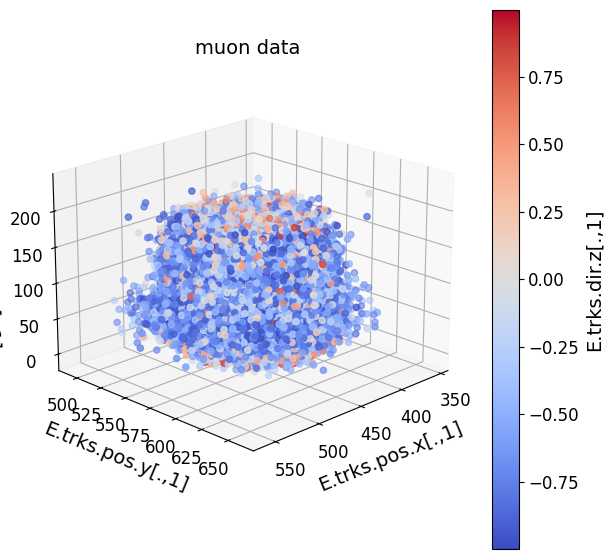

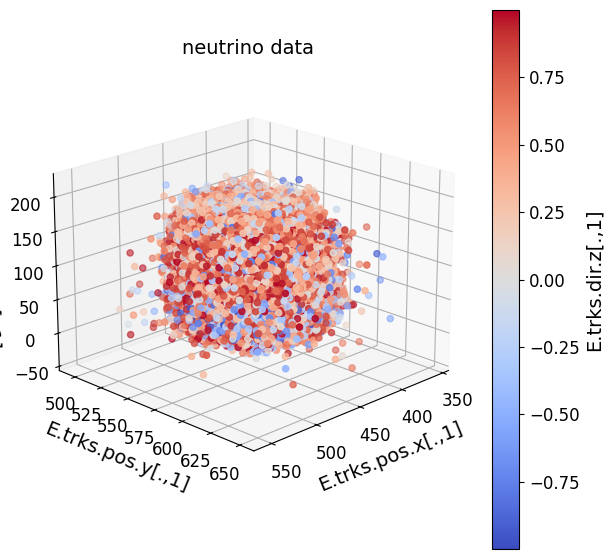

In [12]:
# most important columns according to base classifier for Bjrokeny y
# 1. feature T.sum_jppshower.prefit_posfit_distance (0.037915)
# 2. feature gandalf_shfit_lik_ratio (0.028620)
# 3. feature E.trks.fitinf[:,0,5] (0.028572)
# 4. feature RGS_track_tau (0.022123)
# 5. feature crkv_nhits50[:,0,0] (0.020021)
# 6. feature angle_shfit_gandalf (0.018925)
# 7. feature T.feat_Neutrino2020.QupOvernHits (0.018615)
# 8. feature ratio_both_tot_jg (0.017532)
# 9. feature T.sum_jpptrack.n_within_1deg (0.017132)
# 10. feature T.sum_jppshower.ratio_prefit_fits_near_best (0.016258)
# 11. feature dt_shfit_gandalf (0.016168)
# 12. feature ratio_E_jshf_gandalf (0.015001)
# 13. feature E.trks.fitinf[:,0,9] (0.014681)
# 14. feature E.trks.E[:,1] (0.014525)
# 15. feature closest[:,0,0] (0.014242)
# 16. feature T.sum_jppshower.mean_tres_selected_hits (0.013874)
# 17. feature log_distance_shfit_gandalf_for_shfit_time (0.012814)
# 18. feature T.feat_Neutrino2020.dClosestApproach (0.012686)
# 19. feature closest[:,1,2] (0.012478)
# 20. feature ratio_both_tot_jsh (0.012475)

# most important columns according to base classifier for classification with dir_z>0
# 1. feature LoE_JShower (0.100107)
# 2. feature E.trks.dir.z[:,1] (0.086440)
# 3. feature T.feat_Neutrino2020.QupOvernHits (0.078293)
# 4. feature cos_zenith_recoJShower (0.076029)
# 5. feature T.feat_Neutrino2020.gandalf_pos_r (0.061045)
# 6. feature ratio_casc_100_jsh (0.054969)
# 7. feature closest[:,0,0] (0.045861)
# 8. feature E.trks.E[:,1] (0.037244)
# 9. feature T.feat_Neutrino2020.cherCond_n_hits_trig_dnMup (0.034855)
# 10. feature closest[:,1,0] (0.021439)
# 11. feature T.feat_Neutrino2020.cherCond_n_hits_dnMup (0.021123)
# 12. feature ratio_both_100_jg (0.020734)
# 13. feature furthest[:,0,1] (0.018996)
# 14. feature RGS_track_tau (0.017473)
# 15. feature crkv_nhits20[:,1,0] (0.016302)
# 16. feature angle_shfit_gandalf (0.014163)
# 17. feature T.feat_Neutrino2020.cherCond_hits_trig_meanZposition (0.012787)
# 18. feature ratio_E_jshf_gandalf (0.012112)
# 19. feature crkv_nhits100[:,0,1] (0.011828)
# 20. feature energy_recoTracklength (0.010882)

font_size_title = 14
font_size_label = 14
font_size_tick = 12
figsize = (7, 7)
elev =20
azim = 45
pad = 7

# column_1 = "LoE_JShower"
# column_2 = "ratio_casc_100_jsh"
# column_3 = "cos_zenith_recoJShower"
# column_4 = "E.trks.dir.z[:,1]"

column_1 = "E.trks.pos.x[.,1]"
column_2 = "E.trks.pos.y[.,1]"
column_3 = "E.trks.pos.z[.,1]"
column_4 = "E.trks.dir.z[.,1]"



for label in [0,1]:
    if label == 0:
        mask = df["is_neutrino"] == label
        label_name = "muon data"
    else:
        mask = df["is_neutrino"] == label
        label_name = "neutrino data"
        
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(111, projection='3d')
    # fig.tight_layout(pad=-10)

    # Set the color based on the dir_z variable using a color map
    colors = df[mask][column_4]
    # Create the scatter plot with color mapping
    scatter = ax.scatter3D(df[mask][column_1], df[mask][column_2], df[mask][column_3], c=colors, cmap='coolwarm')

    # Add a colorbar
    colorbar = plt.colorbar(scatter)
    colorbar.set_label(column_4, fontsize=font_size_label)
    colorbar.ax.tick_params(labelsize=font_size_tick)

    # Set labels for the axes
    ax.set_xlabel(column_1, fontsize = font_size_label, labelpad = pad)
    ax.set_ylabel(column_2, fontsize = font_size_label, labelpad = pad)
    ax.set_zlabel(column_3, fontsize = font_size_label, labelpad = pad)


    ax.tick_params(axis='both', which='major', labelsize=font_size_tick)
    ax.view_init(elev=elev, azim=azim)

    plt.title(label_name, fontsize=font_size_title)

    # Show the plot
    plt.show()
    fig.savefig(fname = "figures_classification/figures_E_less_20/upgoing/3d_scatter_"+label_name.split(" ")[0]+"{}{}{}{}elev{}azim{}.png".format(column_1, column_2, column_3, column_4, elev, azim))


## check diff E track and E shower as function of lik_ratio

In [16]:
df["rat_E_track_true"] = df["E.trks.E[:,0]"]/df["energy"]
df["rat_E_track_shower"] = df["E.trks.E[:,0]"]/df["E.trks.E[:,1]"]
df["rat_E_shower_true"] = df["E.trks.E[:,1]"]/df["energy"]

corr = df.drop(columns = simulation_columns).corr()




In [17]:
print(corr["rat_E_track_true"].sort_values(ascending=False))

rat_E_track_true                    1.000000
E.trks.dir.z[:,0]                   0.128435
T.feat_Neutrino2020.QupOvernHits    0.126981
E.trks.dir.z[:,1]                   0.114395
T.sum_jpptrack.n_up                 0.113357
                                      ...   
RGS_track_std                      -0.106046
RGS_track_tau                      -0.106452
T.sum_jpptrack.n_down              -0.112745
cos_zenith_recoJShower             -0.114395
cos_zenith_recoJGandalf            -0.128435
Name: rat_E_track_true, Length: 152, dtype: float64


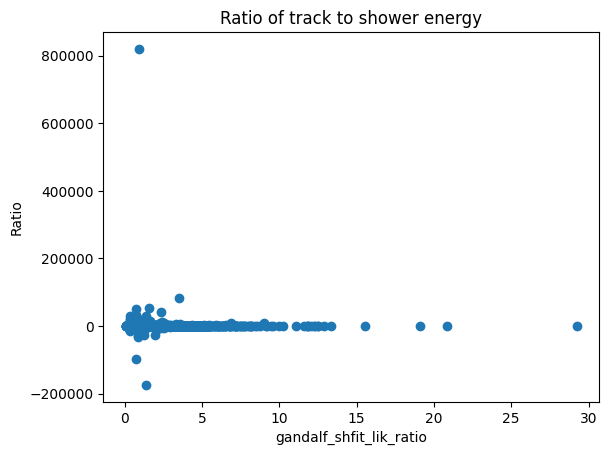

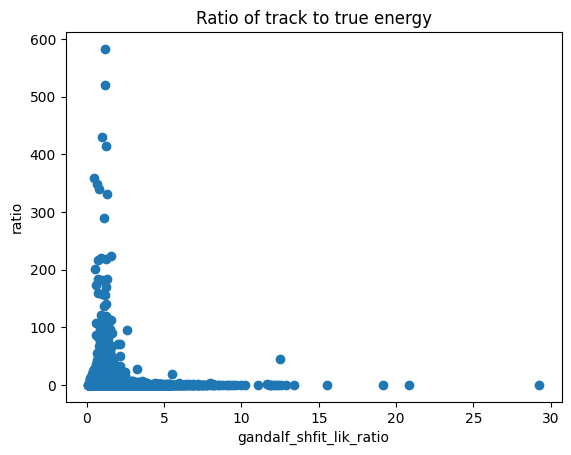

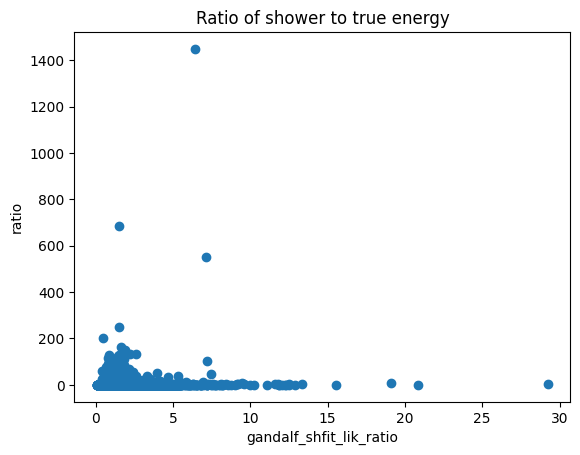

In [10]:
# gandalf_shfit_lik_difference
# gandalf_shfit_lik_ratio
column = "gandalf_shfit_lik_ratio"
rat_E_track_shower = (df["E.trks.E[:,0]"] / df["E.trks.E[:,1]"])
# log_diff_E = np.log10(diff_E)
plt.scatter(df[column], rat_E_track_shower)
plt.xlabel(column)
plt.ylabel("Ratio")
plt.title("Ratio of track to shower energy")
plt.show()

rat_E_track_true = (df["E.trks.E[:,0]"] / df["energy"])
plt.scatter(df[column], rat_E_track_true)
plt.xlabel(column)
plt.ylabel("Ratio")
plt.title("Ratio of track to true energy")
plt.show()

rat_E_shower_true = (df["E.trks.E[:,1]"] / df["energy"])

plt.scatter(df[column], rat_E_shower_true)
plt.xlabel(column)
plt.ylabel("Ratio")
plt.title("Ratio of shower to true energy")
plt.show()

# plt.scatter(df["gandalf_shfit_lik_ratio"], log_diff_E_shower_true)
# plt.xlabel("gandalf_shfit_lik_ratio")
# plt.ylabel("log_diff_E_shower_true")
# plt.show()
